# Données

## Chargement du dataframe global

In [1]:
import pandas as pd

df = pd.read_parquet("./data/df_final.parquet")
print("✅ Dataset rechargé avec succès.")

✅ Dataset rechargé avec succès.


In [2]:
df.shape

(2988181, 66)

In [3]:
df.head()

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,...,31,32,33,34,35,36,37,38,39,40
0,0,1506825423271737,1506825423000,2,157541,1506826828020,4,3,20,1,...,-0.321467,0.910171,0.413014,-0.680843,-0.418416,0.526436,0.305626,-0.30779,-0.606359,-0.650552
1,20,1506825727279757,1506825727000,2,157541,1506836548634,4,1,17,1,...,-0.321467,0.910171,0.413014,-0.680843,-0.418416,0.526436,0.305626,-0.30779,-0.606359,-0.650552
2,44,1506826139185781,1506826139000,5,157541,1506857278141,4,1,17,1,...,-0.321467,0.910171,0.413014,-0.680843,-0.418416,0.526436,0.305626,-0.30779,-0.606359,-0.650552
3,45,1506826142324782,1506826142000,2,157541,1506827309970,4,1,17,1,...,-0.321467,0.910171,0.413014,-0.680843,-0.418416,0.526436,0.305626,-0.30779,-0.606359,-0.650552
4,76,1506826463226813,1506826463000,2,157541,1506828823469,4,3,2,1,...,-0.321467,0.910171,0.413014,-0.680843,-0.418416,0.526436,0.305626,-0.30779,-0.606359,-0.650552


In [4]:
df.columns

Index(['user_id', 'session_id', 'session_start', 'session_size',
       'click_article_id', 'click_timestamp', 'click_environment',
       'click_deviceGroup', 'click_os', 'click_country', 'click_region',
       'click_referrer_type', 'user_status', 'click_datetime',
       'session_start_datetime', 'article_id', 'category_id', 'created_at_ts',
       'publisher_id', 'words_count', 'cluster', 'publish_time_dt', 'nb_clics',
       'popularite_tag', 'popularity_norm', '0', '1', '2', '3', '4', '5', '6',
       '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
       '31', '32', '33', '34', '35', '36', '37', '38', '39', '40'],
      dtype='object')

## Table pré-agrégée utilisateur-clics

In [5]:
user_clicks_df = (
    df.groupby('user_id')['click_article_id']
    .apply(lambda x: list(x.unique()))
    .reset_index()
    .rename(columns={'click_article_id': 'clicked_article_ids'})
)

user_clicks_df.head()
# sauvegarde en parquet ou json (mieux pour utilisation dans une app)
# user_clicks_df.set_index('user_id').to_json("./data/user_clicks.json", orient='index')

,user_id,clicked_article_ids
0,0,"[157541, 68866, 96755, 87224, 87205, 313996, 1..."
1,1,"[235840, 96663, 160474, 59758, 285719, 283392,..."
2,2,"[119592, 30970, 209122, 30760]"
3,3,"[236065, 236294, 233769, 234686, 235665, 16117..."
4,4,"[48915, 44488, 63307, 336499, 271261, 195084, ..."


## Liste des articles

In [6]:
df_articles = pd.read_csv("./data/articles_with_popularity.csv", encoding='utf-8')
df_articles

,article_id,category_id,created_at_ts,publisher_id,words_count,cluster,publish_time_dt,nb_clics,popularite_tag,popularity_norm
0,0,0,1513144419000,0,168,6,2017-12-13 05:53:39,0,jamais_cliqué,0.000000
1,1,1,1405341936000,0,189,4,2014-07-14 12:45:36,0,jamais_cliqué,0.000000
2,2,1,1408667706000,0,250,6,2014-08-22 00:35:06,0,jamais_cliqué,0.000000
3,3,1,1408468313000,0,230,6,2014-08-19 17:11:53,1,banal,0.000027
4,4,1,1407071171000,0,162,6,2014-08-03 13:06:11,0,jamais_cliqué,0.000000
...,...,...,...,...,...,...,...,...,...,...
364042,364042,460,1434034118000,0,144,17,2015-06-11 14:48:38,0,jamais_cliqué,0.000000
364043,364043,460,1434148472000,0,463,0,2015-06-12 22:34:32,8,banal,0.000215
364044,364044,460,1457974279000,0,177,10,2016-03-14 16:51:19,0,jamais_cliqué,0.000000
364045,364045,460,1515964737000,0,126,10,2018-01-14 21:18:57,0,jamais_cliqué,0.000000


## Chargement des embeddings réduits

In [7]:
import pandas as pd

embeddings_df = pd.read_parquet('./data/articles_embeddings_pca.parquet')
print(embeddings_df.shape)

(364047, 41)


In [8]:
embeddings_df.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
article_id,,,,,,,,,,,,,,,,,,,,,
0,-1.854507,5.592460,1.708684,3.835145,-1.415790,0.252193,0.426064,0.545486,-0.807385,-1.520176,...,0.387722,-0.088794,-0.990522,-1.060112,-0.218404,1.099821,-1.175613,1.370616,-0.264820,0.010121
1,-5.362106,-4.123023,-2.357526,3.428027,0.431052,3.722278,2.389840,-1.267174,1.944113,-2.980639,...,0.025550,-0.721554,-0.649877,0.405266,-0.090767,3.094971,0.075174,0.245277,-1.250361,0.294544
2,-3.600062,0.132090,-6.027454,-0.985620,-0.211971,4.591737,-1.815747,-2.170382,-2.783125,-2.804914,...,0.565644,-1.862216,0.336443,-0.072439,0.241451,0.877662,0.154819,1.133954,0.946722,-1.811296
3,-1.158994,-7.293339,-5.916719,1.370538,-2.172245,-1.682458,1.070833,-2.160003,1.947283,-4.069631,...,0.074059,-0.612829,1.511416,-1.071737,1.991804,2.076192,-1.690456,-1.122755,0.714649,-1.576246
4,-1.143028,-2.569431,-2.891985,0.273959,-2.912984,5.608954,0.308916,0.310898,-1.054211,-2.158129,...,-1.527878,-0.155613,0.163369,-0.037283,1.173571,4.232932,-1.287569,1.053415,-0.486084,-0.144514


💥 Si on veut une matrice de similarité complète sa taille (364 047 x 364 047) = 132 teraelements, soit ~494 Go de RAM en float32 🤯 <br>
On est dans une optique MVP avec un déploiement serverless, donc les modèles, fonctions, tables utilisées seront:<br>
📦 Compact : on passe d’un DataFrame d’interactions énorme à une simple table d'utilisateurs.<br>
🚀 Rapide à charger en mémoire (idéal pour des microservices).<br>
🔁 Facile à sérialiser (JSON, pickle, feather, parquet, etc.)<br>
💬 Compatible avec une API GET /recommendations?user_id=123

In [9]:
# conversion des embeddings en tableau NumPy (évite de calculer la matrice de similarité complète)
import numpy as np
article_ids = embeddings_df.index.to_numpy()
article_embeddings = embeddings_df.to_numpy()

# dictionnaire article_id -> vecteur
embedding_dict = dict(zip(article_ids, article_embeddings))

# 🧪 Exploration de différentes approches de recommandation

In [10]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

On va commencer par une fonction de recommandation la plus simple, un vecteur moyen à partir des clics effectués par l'utilisateur. C'est une approche naïve de type content-based, où l'on calcule la moyenne des embeddings des articles précédemment cliqués par un utilisateur pour prédire son prochain clic.

## Fonction de prédiction topN à partir de l'embedding moyen pour un utilisateur

### Prédiction du dernier clic à partir du profil sur l'embedding moyen

In [11]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def predict_topN_articles(user_id, df, embedding_dict, article_ids, article_embeddings, top_n=5):
    """
    Recommande les top-N articles les plus similaires à l'historique d’un utilisateur.

    Retourne :
    - Liste top-N : (article_id, similarité)
    - Dernier article cliqué (target) pour évaluation
    """
    # 1. Récupérer les clics utilisateur
    user_clicks = df[df["user_id"] == user_id].sort_values("click_timestamp")
    clicked_article_ids = user_clicks["click_article_id"].tolist()

    if len(clicked_article_ids) < 2:
        return None, None

    # 2. Séparer les clics passés et la cible
    target_article_id = clicked_article_ids[-1]
    past_article_ids = clicked_article_ids[:-1]

    # 3. Créer le profil utilisateur
    past_vectors = [embedding_dict[aid] for aid in past_article_ids if aid in embedding_dict]
    if not past_vectors:
        return None, target_article_id

    mean_embedding = np.mean(past_vectors, axis=0).reshape(1, -1)

    # 4. Calculer les similarités
    similarities = cosine_similarity(mean_embedding, article_embeddings)[0]

    # 5. Exclure uniquement les articles précédemment cliqués (pas le target)
    clicked_set = set(past_article_ids)
    candidate_indices = [i for i, aid in enumerate(article_ids) if aid not in clicked_set]

    if not candidate_indices:
        return None, target_article_id

    # 6. Retourner les top-N
    top_indices = sorted(candidate_indices, key=lambda i: similarities[i], reverse=True)[:top_n]
    top_n_result = [(article_ids[i], similarities[i]) for i in top_indices]

    return top_n_result, target_article_id


In [12]:
predict_topN_articles(user_id=42, df=df, embedding_dict=embedding_dict,
                      article_ids=article_ids, article_embeddings=article_embeddings, top_n=10)


([(278156, 0.7373912),
  (284712, 0.72253644),
  (331770, 0.7225302),
  (279669, 0.721533),
  (345493, 0.7206063),
  (285310, 0.7205952),
  (345486, 0.72001576),
  (278210, 0.71875995),
  (285500, 0.71721536),
  (281826, 0.7154764)],
 315146)

### Prédiction d'un clic aléatoire à partir du profil sur l'embedding moyen

In [13]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def predict_random_target(user_id, df, embedding_dict, article_ids, article_embeddings, top_n=5, seed=None):
    """
    Même logique que predict_topN_articles, mais avec un clic aléatoire de la session comme cible à prédire.
    """
    if seed is not None:
        np.random.seed(seed)

    user_clicks = df[df["user_id"] == user_id].sort_values("click_timestamp")
    clicked_article_ids = user_clicks["click_article_id"].tolist()

    if len(clicked_article_ids) < 2:
        return None, None

    target_index = np.random.choice(len(clicked_article_ids))
    target_article_id = clicked_article_ids[target_index]
    past_article_ids = clicked_article_ids[:target_index] + clicked_article_ids[target_index+1:]

    # Embeddings du profil
    past_vectors = [embedding_dict[aid] for aid in past_article_ids if aid in embedding_dict]
    if not past_vectors or target_article_id not in embedding_dict:
        return None, target_article_id

    mean_embedding = np.mean(past_vectors, axis=0).reshape(1, -1)
    similarities = cosine_similarity(mean_embedding, article_embeddings)[0]

    # Exclure les articles déjà vus (hors target)
    clicked_set = set(past_article_ids)
    candidate_indices = [i for i, aid in enumerate(article_ids) if aid not in clicked_set]

    top_indices = sorted(candidate_indices, key=lambda i: similarities[i], reverse=True)[:top_n]
    top_preds = [(article_ids[i], similarities[i]) for i in top_indices]

    return top_preds, target_article_id


In [14]:
predict_random_target(user_id=42, df=df, embedding_dict=embedding_dict,
                      article_ids=article_ids, article_embeddings=article_embeddings, top_n=10)


([(331770, 0.74124986),
  (345493, 0.7321098),
  (278156, 0.7307478),
  (279669, 0.72854006),
  (345487, 0.7263887),
  (345486, 0.7249307),
  (281826, 0.7246901),
  (87306, 0.7244965),
  (283205, 0.72274303),
  (284712, 0.7210367)],
 129434)

## Fonction de prédiction du top-N pondérée par récence et fraicheur des articles

### Prédiction du dernier clic à partir du profil embedding moyen pondéré par récence et fraicheur des articles

In [15]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def predict_topN_weighted_by_recency(
    user_id,
    df,
    embedding_dict,
    article_ids,
    article_embeddings,
    alpha=0.9,
    beta=1.0,
    top_n=5
):
    """
    Recommande les top-N articles en pondérant :
    - l'historique utilisateur par la récence des clics (alpha)
    - la recommandation finale par la récence de publication des articles (beta)

    Retour :
    - Liste top-N : (article_id, score_final)
    - article_id du dernier clic
    """
    user_clicks = df[df["user_id"] == user_id].sort_values("click_timestamp")
    clicked_article_ids = user_clicks["click_article_id"].tolist()

    if len(clicked_article_ids) < 2:
        return None, None

    target_article_id = clicked_article_ids[-1]
    past_ids = clicked_article_ids[:-1]

    past_vectors = [embedding_dict[aid] for aid in past_ids if aid in embedding_dict]
    if not past_vectors:
        return None, target_article_id

    embeddings = np.stack(past_vectors)

    # Poids décroissants selon la récence des clics
    weights = np.array([alpha ** i for i in reversed(range(len(embeddings)))])
    weights = weights / weights.sum()

    user_profile = np.average(embeddings, axis=0, weights=weights).reshape(1, -1)

    # Similarités cosinus
    similarities = cosine_similarity(user_profile, article_embeddings)[0]

    # Exclure uniquement les clics passés (pas le target)
    clicked_set = set(past_ids)
    candidate_indices = [i for i, aid in enumerate(article_ids) if aid not in clicked_set]

    if not candidate_indices:
        return None, target_article_id

    # Récupérer les timestamps de publication pour les candidats
    article_to_timestamp = df.drop_duplicates("article_id").set_index("article_id")["created_at_ts"].to_dict()
    candidate_ids = [article_ids[i] for i in candidate_indices]
    candidate_timestamps = np.array([article_to_timestamp.get(aid, 0) for aid in candidate_ids])

    # Calcul du score de fraîcheur (min-max scaling entre 0 et 1)
    if len(candidate_timestamps) > 1:
        min_ts = candidate_timestamps.min()
        max_ts = candidate_timestamps.max()
        recency_scores = (candidate_timestamps - min_ts) / (max_ts - min_ts + 1e-8)
    else:
        recency_scores = np.ones(len(candidate_timestamps))

    # Score combiné : similarité * fraîcheur^beta
    sim_scores = similarities[candidate_indices]
    final_scores = sim_scores * (recency_scores ** beta)

    # Top-N
    top_idx = np.argsort(final_scores)[::-1][:top_n]
    top_articles = [(candidate_ids[i], final_scores[i]) for i in top_idx]

    return top_articles, target_article_id


In [16]:
predict_topN_weighted_by_recency(user_id=42, df=df, embedding_dict=embedding_dict,
                      article_ids=article_ids, article_embeddings=article_embeddings, top_n=10)


([(288881, 0.7382518441602699),
  (285527, 0.6992099886919946),
  (292978, 0.688981697632333),
  (331242, 0.686885931104538),
  (331564, 0.6820750821798228),
  (288735, 0.6767641432796305),
  (285310, 0.6716640236634449),
  (293202, 0.6691471915586807),
  (293266, 0.6616663186832401),
  (348111, 0.6546409894932765)],
 315146)

### Prédiction d'un clic aléatoire à partir du profil embedding moyen pondéré par récence et fraicheur des articles

In [17]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def predict_random_target_weighted(user_id, df, embedding_dict, article_ids, article_embeddings, top_n=5, alpha=0.9, beta=1.0, seed=None):
    """
    Variante pondérée de predict_random_target :
    - clic cible tiré au hasard dans la session
    - pondération des clics par récence (alpha)
    - pondération des candidats par fraîcheur (beta)
    """
    if seed is not None:
        np.random.seed(seed)

    user_clicks = df[df["user_id"] == user_id].sort_values("click_timestamp")
    clicked_article_ids = user_clicks["click_article_id"].tolist()

    if len(clicked_article_ids) < 2:
        return None, None

    target_index = np.random.choice(len(clicked_article_ids))
    target_article_id = clicked_article_ids[target_index]
    past_article_ids = clicked_article_ids[:target_index] + clicked_article_ids[target_index+1:]

    past_vectors = [embedding_dict[aid] for aid in past_article_ids if aid in embedding_dict]
    if not past_vectors or target_article_id not in embedding_dict:
        return None, target_article_id

    embeddings = np.stack(past_vectors)
    weights = np.array([alpha ** i for i in reversed(range(len(embeddings)))])
    weights = weights / weights.sum()

    user_profile = np.average(embeddings, axis=0, weights=weights).reshape(1, -1)
    similarities = cosine_similarity(user_profile, article_embeddings)[0]

    clicked_set = set(past_article_ids)
    candidate_indices = [i for i, aid in enumerate(article_ids) if aid not in clicked_set]
    if not candidate_indices:
        return None, target_article_id

    article_to_timestamp = df.drop_duplicates("article_id").set_index("article_id")["created_at_ts"].to_dict()
    candidate_ids = [article_ids[i] for i in candidate_indices]
    candidate_timestamps = np.array([article_to_timestamp.get(aid, 0) for aid in candidate_ids])

    if len(candidate_timestamps) > 1:
        min_ts = candidate_timestamps.min()
        max_ts = candidate_timestamps.max()
        recency_scores = (candidate_timestamps - min_ts) / (max_ts - min_ts + 1e-8)
    else:
        recency_scores = np.ones(len(candidate_timestamps))

    sim_scores = similarities[candidate_indices]
    final_scores = sim_scores * (recency_scores ** beta)

    top_idx = np.argsort(final_scores)[::-1][:top_n]
    top_articles = [(candidate_ids[i], final_scores[i]) for i in top_idx]

    return top_articles, target_article_id


In [18]:
predict_random_target_weighted(user_id=42, df=df, embedding_dict=embedding_dict,
                      article_ids=article_ids, article_embeddings=article_embeddings, top_n=10)


([(288881, 0.756841045590298),
  (288735, 0.7266851704752936),
  (288942, 0.7260211752619747),
  (292978, 0.7127927843964189),
  (331564, 0.7094756949173407),
  (331863, 0.6998957581181997),
  (348111, 0.6970510525910317),
  (293082, 0.6954100383882363),
  (331242, 0.6946157258465517),
  (289003, 0.6895540520197656)],
 336221)

## Approche par aggrégation de similarités (somme des similarités article-article entre les clics précédents et chaque candidat)

In [19]:
# def predict_top5_from_raw_sum_similarities(user_id, df, embeddings_df):
#     """
#     Prédit les articles les plus similaires aux articles cliqués par l'utilisateur
#     en agrégeant les similarités cosinus (somme) entre chaque clic passé et tous les articles.

#     Cette version est identique à celle du modèle ContentBasedRecommender, mais sous forme de fonction.
#     """
#     # Récupération des articles cliqués par l'utilisateur
#     clicked_article_ids = df[df['user_id'] == user_id]['article_id'].tolist()

#     if len(clicked_article_ids) < 2:
#         return None, None

#     past_article_ids = clicked_article_ids[:-1]  # on exclut le dernier clic à prédire
#     target_article_id = clicked_article_ids[-1]

#     # Embeddings des articles cliqués
#     clicked_embeddings = embeddings_df.loc[past_article_ids].values  # shape (n_clicks, dim)

#     # Embeddings de tous les articles
#     all_article_ids = embeddings_df.index
#     all_embeddings = embeddings_df.values  # shape (n_articles, dim)

#     # Similarités cosinus entre chaque clic et chaque article
#     similarities = cosine_similarity(clicked_embeddings, all_embeddings)  # shape (n_clicks, n_articles)

#     # Agrégation par somme
#     summed_similarities = np.sum(similarities, axis=0)  # shape (n_articles,)

#     # Construction du DataFrame
#     sim_df = pd.DataFrame({
#         "article_id": all_article_ids,
#         "similarity": summed_similarities
#     })

#     # Exclusion des articles déjà cliqués
#     sim_df = sim_df[~sim_df["article_id"].isin(clicked_article_ids)]
#     top5 = sim_df.sort_values(by="similarity", ascending=False).head(5).reset_index(drop=True)

#     return top5, target_article_id


## Approche par calcul de similarité de chaque article cliqué avec les embeddings

## Introduction d'un biais de popularité des articles

In [19]:
def compute_combined_score(user_vector, article_embeddings_df, df_articles, alpha=0.9):
    """
    Calcule un score combiné entre similarité cosinus et popularité normalisée.
    alpha = poids accordé à la similarité de contenu
    (1 - alpha) = poids accordé à la popularité
    """
    from sklearn.metrics.pairwise import cosine_similarity

    # Similarité cosinus
    sim = cosine_similarity([user_vector], article_embeddings_df.values)[0]

    # Popularité normalisée alignée sur l’index
    pop = df_articles.loc[article_embeddings_df.index, "popularity_norm"].values

    # Score final combiné
    return alpha * sim + (1 - alpha) * pop


# ✨ Visualisation à partir d'exemples

## Préparation des données utilisateur

In [20]:
def prepare_user_data(user_clicks_df, embedding_dict, user_id=None, min_clicks=2, debug=False):
    """
    Version optimisée avec table pré-agrégée : sélectionne un utilisateur et calcule son embedding moyen.

    Paramètres :
    - user_clicks_df : DataFrame avec 'user_id' et 'clicked_article_ids' (liste d’IDs)
    - embedding_dict : dict {article_id: embedding vector}
    - user_id : (optionnel) ID à forcer
    - min_clicks : nombre minimum de clics requis
    - debug : bool, infos affichées si True

    Retour :
    - selected_user : ID utilisateur sélectionné
    - clicked_article_ids : liste complète des articles
    - past_article_ids : tous sauf le dernier
    - target_article_id : dernier clic (à prédire)
    - mean_embedding : embedding moyen des articles précédents
    """
    # Compte des clics par utilisateur
    user_click_counts = user_clicks_df['clicked_article_ids'].apply(len)

    if user_id is None:
        mean_clicks = user_click_counts.mean()
        lower_bound = int(mean_clicks * 0.8)
        upper_bound = int(mean_clicks * 1.2)

        eligible_users = user_clicks_df[user_click_counts.between(lower_bound, upper_bound)]

        selected_user = None
        clicked_article_ids = []

        while selected_user is None or len(clicked_article_ids) < min_clicks:
            row = eligible_users.sample(1).iloc[0]
            selected_user = row['user_id']
            clicked_article_ids = row['clicked_article_ids']
    else:
        row = user_clicks_df[user_clicks_df['user_id'] == user_id]
        if row.empty:
            raise ValueError(f"Utilisateur {user_id} introuvable.")
        clicked_article_ids = row.iloc[0]['clicked_article_ids']
        selected_user = user_id
        if len(clicked_article_ids) < min_clicks:
            raise ValueError(f"L'utilisateur {selected_user} n'a que {len(clicked_article_ids)} clic(s).")

    # Séparation des clics passés et cible
    target_article_id = clicked_article_ids[-1]
    past_article_ids = clicked_article_ids[:-1]

    # Extraction des embeddings disponibles
    past_vectors = [embedding_dict[aid] for aid in past_article_ids if aid in embedding_dict]

    if not past_vectors:
        raise ValueError(f"Aucun embedding trouvé pour les clics de l’utilisateur {selected_user}.")

    mean_embedding = np.mean(past_vectors, axis=0).reshape(1, -1)

    if debug:
        print(f"Utilisateur sélectionné : {selected_user}")
        print(f"Nombre total de clics : {len(clicked_article_ids)}")
        print(f"Article cible : {target_article_id}")
        print(f"Articles précédents : {past_article_ids}")

    return selected_user, clicked_article_ids, past_article_ids, target_article_id, mean_embedding


In [21]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize_user_recommendations(user_id, user_clicks_df, embedding_dict, article_ids, article_embeddings, df, top_n=5):
    # Étape 1 : Données utilisateur
    _, clicked_article_ids, past_article_ids, target_article_id, mean_embedding = prepare_user_data(
        user_clicks_df, embedding_dict, user_id=user_id, debug=True
    )

    # Étape 2 : Recommandations
    recommendations, _ = predict_topN_articles(
        user_id=user_id,
        df=df,
        embedding_dict=embedding_dict,
        article_ids=article_ids,
        article_embeddings=article_embeddings,
        top_n=top_n
    )

    recommended_ids = [aid for aid, _ in recommendations]

    # Étape 3 : Vecteurs à projeter
    vectors = []
    labels = []

    # Articles cliqués précédents
    for aid in past_article_ids:
        if aid in embedding_dict:
            vectors.append(embedding_dict[aid])
            labels.append("Past Click")

    # Article cible
    if target_article_id in embedding_dict:
        vectors.append(embedding_dict[target_article_id])
        labels.append("Target")

    # Articles recommandés
    for aid in recommended_ids:
        if aid in embedding_dict:
            vectors.append(embedding_dict[aid])
            labels.append("Recommendation")

    # t-SNE projection (correction : conversion en np.array)
    X = np.array(vectors)
    tsne = TSNE(n_components=2, random_state=42, perplexity=min(5, len(X) - 1))  # éviter l'erreur perplexity >= n_samples
    proj = tsne.fit_transform(X)

    # Étape 4 : Visualisation
    color_map = {"Past Click": "blue", "Target": "red", "Recommendation": "green"}

    plt.figure(figsize=(8, 6))
    for label in set(labels):
        idx = [i for i, l in enumerate(labels) if l == label]
        plt.scatter(proj[idx, 0], proj[idx, 1], label=label, color=color_map[label], alpha=0.7, s=60)

    plt.title(f"Projection t-SNE pour l'utilisateur {user_id}")
    plt.legend()
    plt.grid(True)
    plt.show()


In [39]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

def visualize_user_recommendations(user_id, user_clicks_df, embedding_dict, article_ids, article_embeddings, df, top_n=5):
    # Étape 1 : Données utilisateur
    _, clicked_article_ids, past_article_ids, target_article_id, mean_embedding = prepare_user_data(
        user_clicks_df, embedding_dict, user_id=user_id, debug=True
    )

    # Étape 2 : Recommandations
    recommendations, _ = predict_topN_articles(
        user_id=user_id,
        df=df,
        embedding_dict=embedding_dict,
        article_ids=article_ids,
        article_embeddings=article_embeddings,
        top_n=top_n
    )

    recommended_ids = [aid for aid, _ in recommendations]

    # Étape 3 : Vecteurs + labels
    vectors = []
    labels = []
    article_ids_to_plot = []

    for aid in past_article_ids:
        if aid in embedding_dict:
            vectors.append(embedding_dict[aid])
            labels.append("Past Click")
            article_ids_to_plot.append(aid)

    if target_article_id in embedding_dict:
        vectors.append(embedding_dict[target_article_id])
        labels.append("Target")
        article_ids_to_plot.append(target_article_id)

    for aid in recommended_ids:
        if aid in embedding_dict:
            vectors.append(embedding_dict[aid])
            labels.append("Recommendation")
            article_ids_to_plot.append(aid)

    X = np.array(vectors)
    tsne = TSNE(n_components=2, random_state=42, perplexity=min(5, len(X) - 1))
    proj = tsne.fit_transform(X)

    color_map = {"Past Click": "blue", "Target": "red", "Recommendation": "green"}

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Graphe 1 : par type
    for label in set(labels):
        idx = [i for i, l in enumerate(labels) if l == label]
        axes[0].scatter(proj[idx, 0], proj[idx, 1], label=label, color=color_map[label], alpha=0.7, s=60)

    axes[0].set_title(f"Projection t-SNE par type pour l'utilisateur {user_id}")
    axes[0].legend()
    axes[0].grid(True)

    # Graphe 2 : colorisation par cluster (sans légende)
    clusters = []
    for aid in article_ids_to_plot:
        if aid in df['article_id'].values:
            clusters.append(df[df['article_id'] == aid]['cluster'].values[0])
        else:
            clusters.append(-1)

    scatter = axes[1].scatter(proj[:, 0], proj[:, 1], c=clusters, cmap='tab10', alpha=0.7, s=60)
    axes[1].set_title(f"Projection t-SNE par cluster pour l'utilisateur {user_id}")
    axes[1].grid(True)

    # Annotations (flèches)
    for i, label in enumerate(labels):
        if label == "Target":
            axes[1].annotate(
                "Target",
                xy=(proj[i, 0], proj[i, 1]),
                xytext=(proj[i, 0] + 5, proj[i, 1] + 5),
                arrowprops=dict(arrowstyle="->", color="red", lw=2),
                color="red"
            )
        elif label == "Recommendation":
            axes[1].annotate(
                "Recommendation",
                xy=(proj[i, 0], proj[i, 1]),
                xytext=(proj[i, 0] + 5, proj[i, 1] + 5),
                arrowprops=dict(arrowstyle="->", color="green", lw=2),
                color="green"
            )

    # Dernier clic (last click)
    if past_article_ids:
        last_click_id = past_article_ids[-1]
        try:
            last_click_idx = article_ids_to_plot.index(last_click_id)
            axes[1].annotate(
                "Last Click",
                xy=(proj[last_click_idx, 0], proj[last_click_idx, 1]),
                xytext=(proj[last_click_idx, 0] + 5, proj[last_click_idx, 1] + 5),
                arrowprops=dict(arrowstyle="->", color="blue", lw=2),
                color="blue"
            )
        except ValueError:
            pass

    plt.tight_layout()
    plt.show()


Utilisateur sélectionné : 42
Nombre total de clics : 31
Article cible : 292594
Articles précédents : [284346, 145166, 157861, 129434, 336220, 336380, 336221, 235854, 75825, 313996, 119193, 225019, 71608, 107216, 292749, 331116, 208518, 315146, 218028, 158541, 226595, 285331, 352902, 119534, 285414, 353673, 288457, 226648, 9126, 284178]


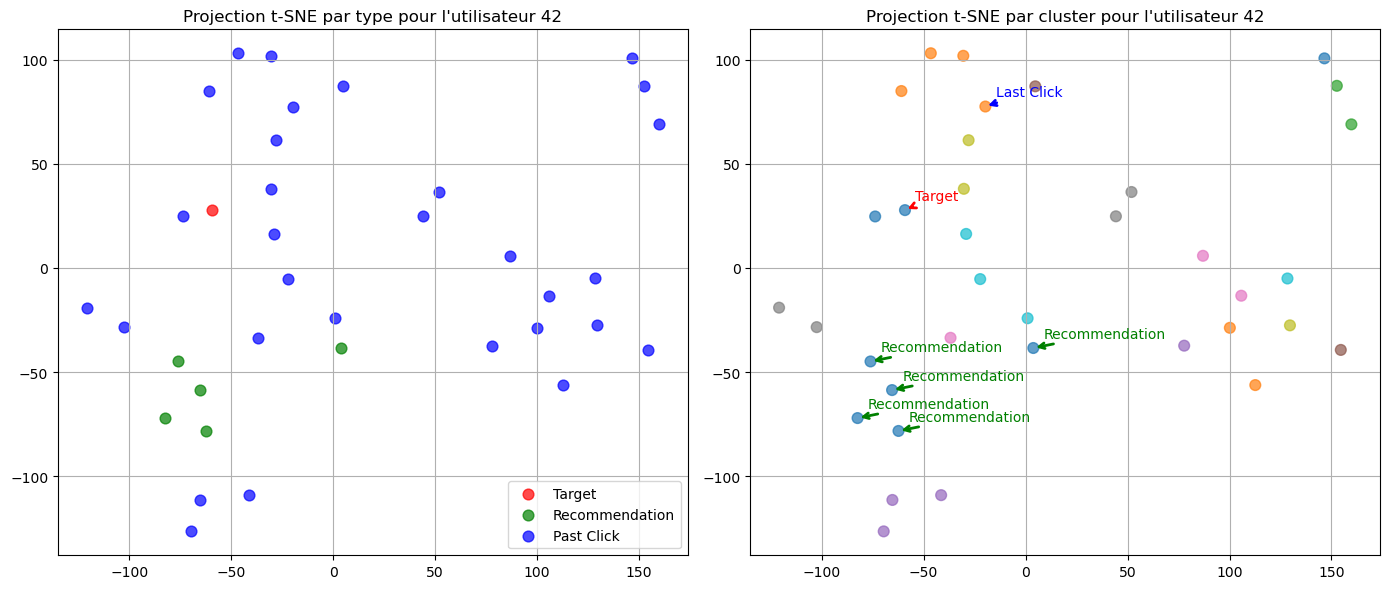

In [40]:
visualize_user_recommendations(
    user_id=42,
    user_clicks_df=user_clicks_df,
    embedding_dict=embedding_dict,
    article_ids=article_ids,
    article_embeddings=article_embeddings,
    df=df,  # dataframe avec 'click_article_id' et 'click_timestamp'
    top_n=5
)


In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

def plot_similarity_heatmap(mean_embedding, embedding_dict, past_article_ids, target_article_id, recommended_ids, title="Similarité cosinus"):
    """
    Affiche une heatmap des similarités entre le vecteur moyen utilisateur et :
    - les articles cliqués
    - l’article cible
    - les articles recommandés
    """
    # Liste des articles à comparer
    items = past_article_ids + [target_article_id] + recommended_ids
    labels = (
        [f"past_{i}" for i in range(len(past_article_ids))] +
        ["target"] +
        [f"rec_{i}" for i in range(len(recommended_ids))]
    )

    # Embeddings des articles
    vectors = [embedding_dict[aid] for aid in items if aid in embedding_dict]

    # Similarités cosinus entre le profil utilisateur et chaque vecteur
    sims = cosine_similarity(mean_embedding, np.stack(vectors))[0]

    # Affichage
    plt.figure(figsize=(12, 1.5))
    ax = sns.heatmap(
        sims.reshape(1, -1),
        annot=True,
        fmt=".2f",
        xticklabels=labels,
        yticklabels=["user_profile"],
        cmap="YlGnBu",
        cbar=False
    )
    plt.title(title)
    plt.yticks(rotation=0)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


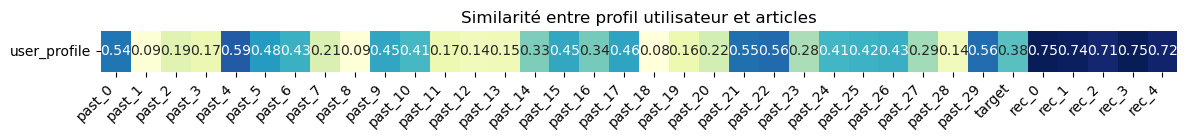

In [42]:
selected_user, clicked_article_ids, past_ids, target_id, mean_embed = prepare_user_data(
    user_clicks_df, embedding_dict, user_id=42
)

recommendations, _ = predict_topN_articles(
    user_id=42,
    df=df,
    embedding_dict=embedding_dict,
    article_ids=article_ids,
    article_embeddings=article_embeddings,
    top_n=5
)

recommended_ids = [aid for aid, _ in recommendations]

plot_similarity_heatmap(
    mean_embedding=mean_embed,
    embedding_dict=embedding_dict,
    past_article_ids=past_ids,
    target_article_id=target_id,
    recommended_ids=recommended_ids,
    title="Similarité entre profil utilisateur et articles"
)


Le modèle même le plus simple prédit des éléments très similaires au profil moyen mais l'utilisateur agit autrement (sollicitation externe, influence non modélisée)

## Fonctions de visualisation avancées (histogramme de similarité, TSNE) clics, embedding moyen, clic réel, top-N prédition

In [25]:
def plot_target_similarity_distribution(user_clicks_df, df, embedding_dict, article_ids, article_embeddings, n_users=500):
    import matplotlib.pyplot as plt
    from sklearn.metrics.pairwise import cosine_similarity
    import numpy as np

    sims = []
    all_users = user_clicks_df[user_clicks_df['clicked_article_ids'].apply(len) > 1]['user_id'].tolist()
    users = np.random.choice(all_users, size=min(n_users, len(all_users)), replace=False)

    for user_id in users:
        clicks = df[df["user_id"] == user_id].sort_values("click_timestamp")["click_article_id"].tolist()
        if len(clicks) < 2:
            continue
        target = clicks[-1]
        past = clicks[:-1]
        past_vecs = [embedding_dict[aid] for aid in past if aid in embedding_dict]
        if target not in embedding_dict or not past_vecs:
            continue
        profile = np.mean(past_vecs, axis=0).reshape(1, -1)
        sim = cosine_similarity(profile, embedding_dict[target].reshape(1, -1))[0][0]
        sims.append(sim)

    sims = np.array(sims)
    q25, q50, q75 = np.percentile(sims, [25, 50, 75])

    colors = ['red' if s < q25 else 'orange' if s < q50 else 'skyblue' if s < q75 else 'green' for s in sims]

    plt.figure(figsize=(10, 5))
    plt.hist(sims, bins=30, color='gray', edgecolor='black', alpha=0.3)
    for color, label in zip(['red', 'orange', 'skyblue', 'green'], ['< Q1', 'Q1–Q2', 'Q2–Q3', '> Q3']):
        plt.axvspan(
            {'red': sims.min(), 'orange': q25, 'skyblue': q50, 'green': q75}[color],
            {'red': q25, 'orange': q50, 'skyblue': q75, 'green': sims.max()}[color],
            color=color, alpha=0.2, label=label
        )

    plt.title("Distribution des similarités profil ↔ target (colorée par quartiles)")
    plt.xlabel("Similarité cosinus")
    plt.ylabel("Nombre d'utilisateurs")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"Moyenne des similarités : {np.mean(sims):.4f}")
    print(f"Médiane : {np.median(sims):.4f}")


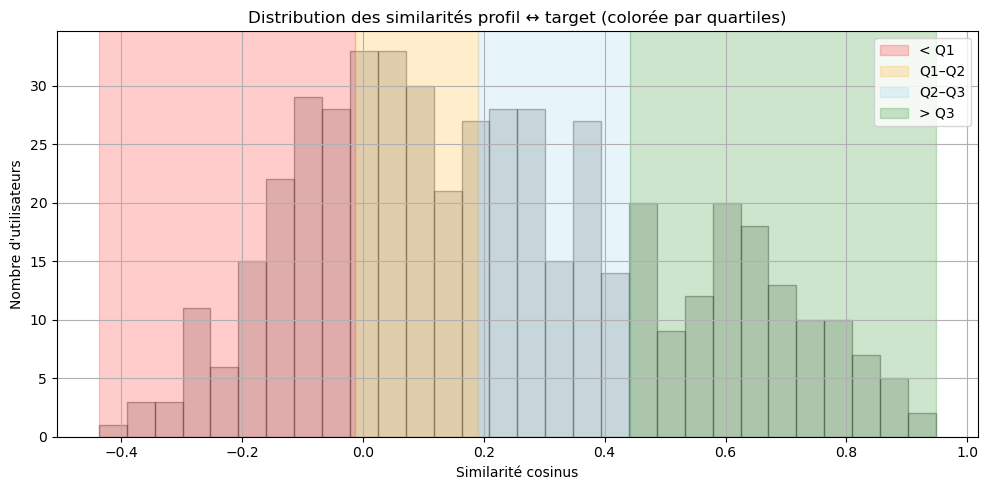

Moyenne des similarités : 0.2228
Médiane : 0.1909


In [26]:
plot_target_similarity_distribution(user_clicks_df, df, embedding_dict, article_ids, article_embeddings)


In [27]:
def plot_score_distribution(scores_df, target_article_id, top_preds=None, score_col="score", title=None):
    """
    Histogramme des scores avec lignes pour :
    - l’article réellement cliqué
    - les top prédictions

    Ajoute :
    - Dégradé de couleurs pour les prédictions
    - Affichage des stats (médiane, score target, etc.)
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    score_values = scores_df[score_col].values

    plt.figure(figsize=(10, 6))
    sns.histplot(score_values, bins=100, kde=False, color="steelblue", label="Distribution des scores", alpha=0.6)

    # Lignes : prédictions
    if top_preds is not None:
        top_preds = top_preds.rename(columns={"similarity": "score"})
        for i, row in top_preds.iterrows():
            color = "purple" if i == 0 else "green"
            alpha = 1.0 if i == 0 else 0.5
            label = "Top-1 prédiction" if i == 0 else ("Autres prédictions" if i == 1 else None)
            plt.axvline(row["score"], color=color, linestyle="--", linewidth=2, alpha=alpha, label=label)

    # Ligne : clic réel
    if target_article_id in scores_df["article_id"].values:
        target_score = scores_df.loc[scores_df["article_id"] == target_article_id, score_col].values[0]
        plt.axvline(target_score, color="red", linestyle="-", linewidth=2, label="Clic réel")

        # Calcul du rang du target
        target_rank = (score_values > target_score).sum() + 1
        total = len(score_values)
    else:
        target_score = None
        target_rank = None
        total = None

    # Titre et axes
    plt.title(title or "Distribution des scores du modèle")
    plt.xlabel("Score de similarité")
    plt.ylabel("Nombre d'articles")
    plt.grid(True)

    # Légende unique
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())

    plt.tight_layout()
    plt.show()

    # Infos supplémentaires
    if target_score is not None:
        print(f"Score de l’article cliqué : {target_score:.4f}")
        print(f"Rang du clic réel : {target_rank} / {total}")
        print(f"Score médian global : {np.median(score_values):.4f}")
        if top_preds is not None:
            print(f"Score moyen top-{len(top_preds)} : {top_preds['score'].mean():.4f}")


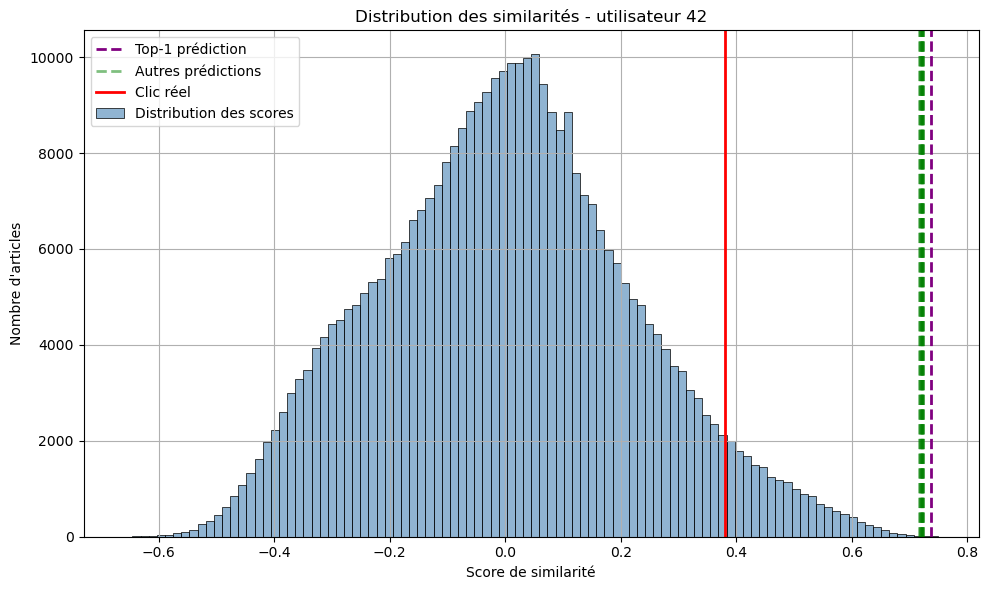

Score de l’article cliqué : 0.3809
Rang du clic réel : 18913 / 364047
Score médian global : 0.0018
Score moyen top-10 : 0.7217


In [28]:
# Exemple avec l'utilisateur choisi
# Étape 1 : Préparer les données utilisateur
selected_user, clicked_article_ids, past_ids, target_id, mean_embed = prepare_user_data(
    user_clicks_df, embedding_dict, user_id=42
)

# Étape 2 : Calculer les similarités avec tous les articles
from sklearn.metrics.pairwise import cosine_similarity

all_similarities = cosine_similarity(mean_embed, article_embeddings)[0]
scores_df = pd.DataFrame({
    "article_id": article_ids,
    "score": all_similarities
})

# Étape 3 : Obtenir les prédictions du modèle (top-N)
top_preds, _ = predict_topN_articles(
    user_id=42,
    df=df,
    embedding_dict=embedding_dict,
    article_ids=article_ids,
    article_embeddings=article_embeddings,
    top_n=10
)

top_preds_df = pd.DataFrame(top_preds, columns=["article_id", "similarity"])

# Étape 4 : Visualisation de la distribution des scores
plot_score_distribution(
    scores_df=scores_df,
    target_article_id=target_id,
    top_preds=top_preds_df,
    score_col="score",
    title="Distribution des similarités - utilisateur 42"
)


In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from scipy.spatial import ConvexHull

def plot_tsne_visualization(
    embeddings_df,
    past_article_ids,
    target_article_id,
    top_preds=None,
    mean_embedding=None,
    show_labels=True
):
    """
    Visualisation t-SNE enrichie :
    - clics utilisateur
    - clic réel
    - top-k prédictions
    - vecteur moyen
    - zone d'intérêt (convex hull)
    """

    # Articles à projeter
    articles_to_plot = past_article_ids + [target_article_id]
    if top_preds is not None:
        articles_to_plot += top_preds["article_id"].tolist()

    unique_articles_to_plot = list(dict.fromkeys(articles_to_plot))  # garde l’ordre

    label_map = {aid: "click" for aid in past_article_ids}

    if mean_embedding is not None:
        include_mean = True
    else:
        include_mean = False

    plot_embeddings = embeddings_df.loc[unique_articles_to_plot].copy()

    if include_mean:
        mean_df = pd.DataFrame(mean_embedding, columns=plot_embeddings.columns, index=["mean"])
        plot_embeddings = pd.concat([plot_embeddings, mean_df])
        label_map["mean"] = "mean"

    # Structuration stable
    plot_embeddings = plot_embeddings.reset_index(drop=False).rename(columns={"index": "article_id"})
    plot_embeddings["label"] = plot_embeddings["article_id"].map(label_map).fillna("other")
    plot_embeddings = plot_embeddings.set_index("article_id")

    # t-SNE projection
    tsne_input = plot_embeddings.drop(columns="label").values.astype(np.float32)
    tsne = TSNE(n_components=2, random_state=42, perplexity=min(5, len(tsne_input)-1), n_iter=1000, init='pca')
    tsne_proj = tsne.fit_transform(tsne_input)

    tsne_df = pd.DataFrame(tsne_proj, index=plot_embeddings.index, columns=["Dim1", "Dim2"])
    tsne_df["label"] = plot_embeddings["label"]

    # Affichage
    plt.figure(figsize=(10, 8))

    # Convex Hull (zone d’intérêt utilisateur)
    click_points = tsne_df[tsne_df["label"] == "click"][["Dim1", "Dim2"]].values
    if len(click_points) >= 3:
        hull = ConvexHull(click_points)
        for simplex in hull.simplices:
            plt.plot(click_points[simplex, 0], click_points[simplex, 1], 'gray', linestyle="--", alpha=0.5)

    # Scatter enrichi
    for idx, row in tsne_df.iterrows():
        label = row["label"]
        if label == "mean":
            plt.scatter(row["Dim1"], row["Dim2"], color="green", s=160, marker="X", label="Vecteur moyen")
        elif idx == target_article_id:
            plt.scatter(row["Dim1"], row["Dim2"], color="red", s=160, marker="D", label="Clic réel")
            if show_labels:
                plt.text(row["Dim1"] + 1, row["Dim2"], f"target {idx}", fontsize=9, color="red")
        elif top_preds is not None and idx in top_preds["article_id"].values:
            if idx == top_preds.iloc[0]["article_id"]:
                plt.scatter(row["Dim1"], row["Dim2"], color="purple", s=140, marker="*", label="Top-1 prédiction")
                if show_labels:
                    plt.text(row["Dim1"] + 1, row["Dim2"], f"top-1 {idx}", fontsize=9, color="purple")
            else:
                plt.scatter(row["Dim1"], row["Dim2"], color="lightgreen", s=120, marker="P", label="Autre prédiction")
        elif label == "click":
            plt.scatter(row["Dim1"], row["Dim2"], color="orange", s=90, alpha=0.8, marker="o", label="Clic utilisateur")
        else:
            plt.scatter(row["Dim1"], row["Dim2"], color="gray", s=60, alpha=0.4)

    # Légende sans doublon
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), fontsize=9)

    plt.title("t-SNE des préférences utilisateur & recommandations", fontsize=14)
    plt.xlabel("Dim 1")
    plt.ylabel("Dim 2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


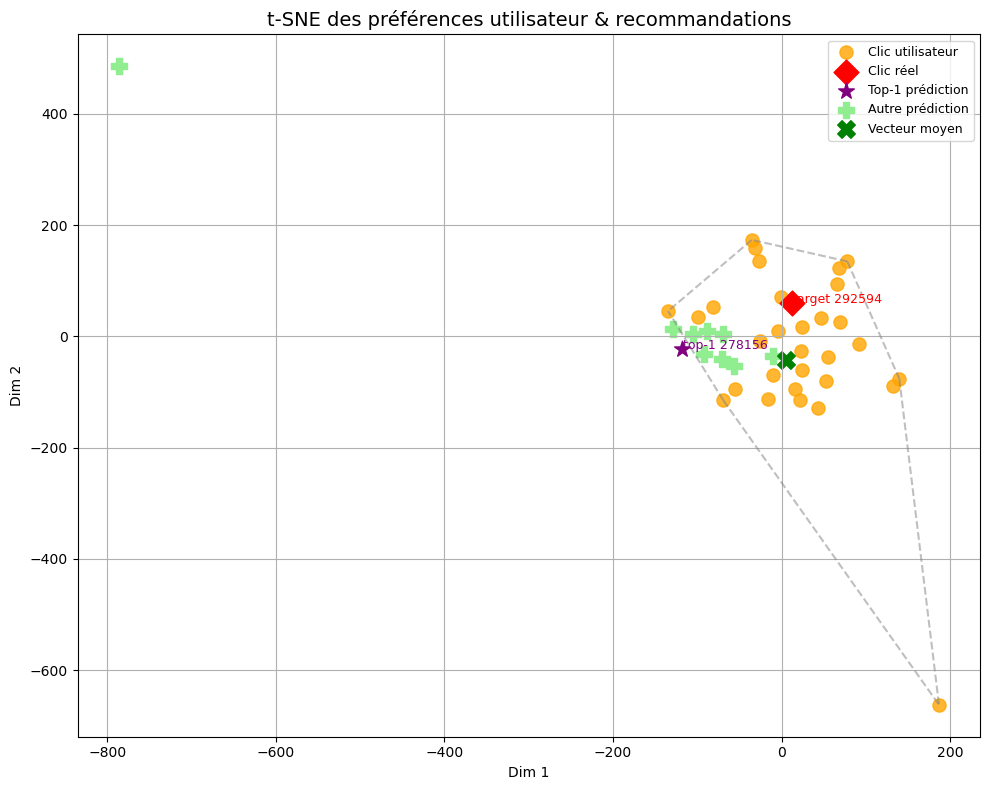

In [50]:
plot_tsne_visualization(
    embeddings_df=embeddings_df,
    past_article_ids=past_ids,
    target_article_id=target_id,
    top_preds=top_preds_df,
    mean_embedding=mean_embed
)


## Visualisation pour un utilisateur au hasard

In [51]:
def analyze_user_recommendation(
    user_clicks_df,
    df,
    embeddings_df,
    embedding_dict,
    article_ids,
    article_embeddings,
    df_articles,
    user_id=None,
    top_n=5,
    alpha=0.9,
    debug=True
):
    """
    Fonction complète d’analyse et de visualisation :
    - Sélection d’un utilisateur (ou aléatoire)
    - Calcul des similarités
    - Génération des recommandations
    - Visualisation heatmap + histogramme + t-SNE

    Paramètres :
    - user_clicks_df : DataFrame pré-agrégée avec clicked_article_ids
    - df : DataFrame des clics (avec created_at_ts)
    - embeddings_df : DataFrame indexé par article_id
    - embedding_dict : dictionnaire article_id → embedding numpy
    - article_ids : np.array des articles
    - article_embeddings : np.array des embeddings
    - user_id : (optionnel) utilisateur ciblé
    - top_n : nombre de recommandations
    - debug : affiche les infos utilisateur

    Fonction enrichie : recommandations avec score combiné (similarité + popularité)
    - alpha : importance de la similarité (entre 0 et 1)
    """

    import matplotlib.pyplot as plt
    from sklearn.metrics.pairwise import cosine_similarity
    import pandas as pd

    # 1. Sélection utilisateur + données
    selected_user, clicked_article_ids, past_ids, target_id, mean_embed = prepare_user_data(
        user_clicks_df, embedding_dict, user_id=user_id, debug=debug
    )

    # 2. Calcul des scores combinés
    combined_scores = compute_combined_score(
        user_vector=mean_embed.flatten(),
        article_embeddings_df=embeddings_df,
        df_articles=df_articles,
        alpha=alpha
    )

    scores_df = pd.DataFrame({
        "article_id": embeddings_df.index,
        "score": combined_scores
    })

    # 3. Recommandations top-N
    top_preds_df = scores_df.sort_values(by="score", ascending=False).head(top_n).reset_index(drop=True)

    # 4. Visualisation heatmap
    print("\n📊 Heatmap des similarités :")
    plot_similarity_heatmap(
        mean_embedding=mean_embed,
        embedding_dict=embedding_dict,
        past_article_ids=past_ids,
        target_article_id=target_id,
        recommended_ids=top_preds_df["article_id"].tolist(),
        title=f"User {selected_user} - Score combiné (α={alpha})"
    )

    # 5. Histogramme des scores
    from copy import deepcopy
    _top_preds_df = deepcopy(top_preds_df)
    print("\n📉 Histogramme des scores :")
    plot_score_distribution(
        scores_df=scores_df,
        target_article_id=target_id,
        top_preds=_top_preds_df.rename(columns={"score": "similarity"}),
        score_col="score",
        title="Distribution des scores combinés"
    )

    # 6. Projection t-SNE
    print("\n🧭 Projection t-SNE :")
    plot_tsne_visualization(
        embeddings_df=embeddings_df,
        past_article_ids=past_ids,
        target_article_id=target_id,
        top_preds=top_preds_df,
        mean_embedding=mean_embed,
        show_labels=True
    )


Utilisateur sélectionné : 42
Nombre total de clics : 31
Article cible : 292594
Articles précédents : [284346, 145166, 157861, 129434, 336220, 336380, 336221, 235854, 75825, 313996, 119193, 225019, 71608, 107216, 292749, 331116, 208518, 315146, 218028, 158541, 226595, 285331, 352902, 119534, 285414, 353673, 288457, 226648, 9126, 284178]

📊 Heatmap des similarités :


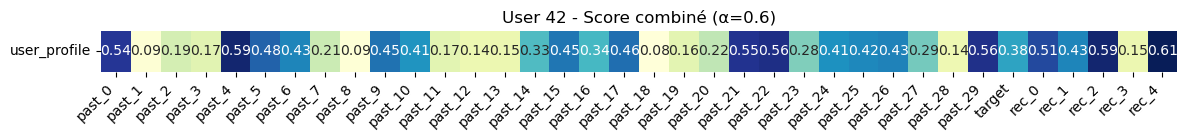


📉 Histogramme des scores :


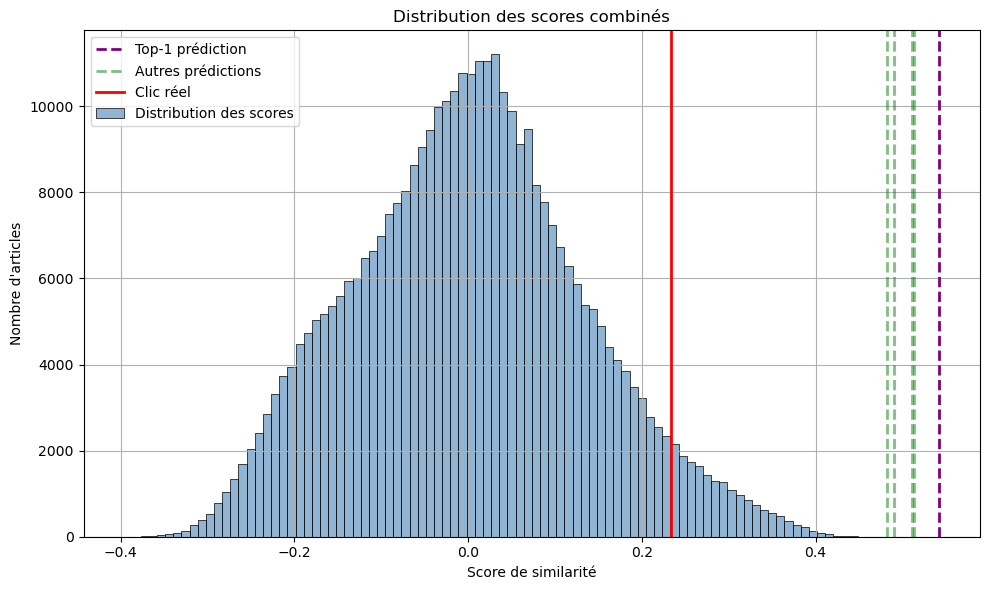

Score de l’article cliqué : 0.2331
Rang du clic réel : 17853 / 364047
Score médian global : 0.0012
Score moyen top-5 : 0.5079

🧭 Projection t-SNE :


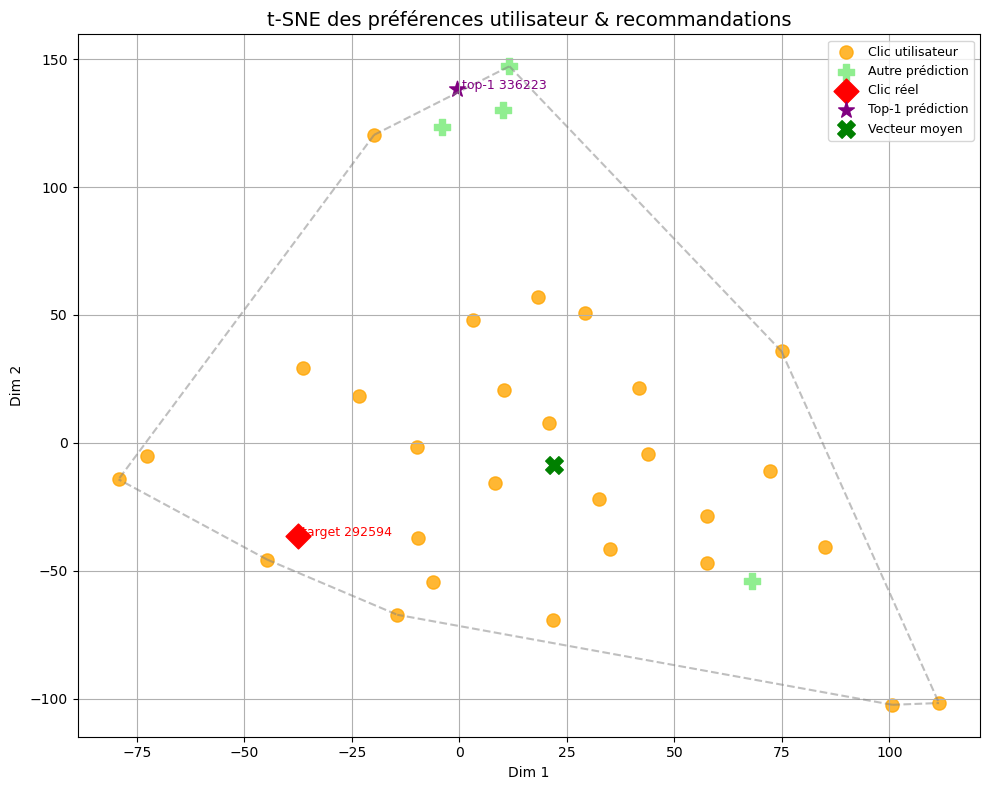

In [52]:
analyze_user_recommendation(
    user_clicks_df=user_clicks_df,
    df=df,
    embeddings_df=embeddings_df,
    embedding_dict=embedding_dict,
    article_ids=article_ids,
    article_embeddings=article_embeddings,
    df_articles=df_articles, # pour la colonne avec la popularité
    alpha=0.6, # importance de la similarité cosine / popularité
    user_id=42 # ou None
)


In [53]:
def analyze_user_recommendation_recency(
    user_clicks_df,
    df,
    embeddings_df,
    embedding_dict,
    article_ids,
    article_embeddings,
    user_id=None,
    top_n=5,
    debug=True,
    alpha=0.9,
    beta=1.0
):
    """
    Fonction complète d’analyse et de visualisation avec pondération temporelle :
    - Sélection d’un utilisateur (ou aléatoire)
    - Calcul des similarités pondérées par la récence
    - Génération des recommandations
    - Visualisation heatmap + histogramme + t-SNE

    Paramètres :
    - user_clicks_df : DataFrame pré-agrégée avec clicked_article_ids
    - df : DataFrame des clics (avec created_at_ts)
    - embeddings_df : DataFrame indexé par article_id
    - embedding_dict : dictionnaire article_id → embedding numpy
    - article_ids : np.array des articles
    - article_embeddings : np.array des embeddings
    - user_id : (optionnel) utilisateur ciblé
    - top_n : nombre de recommandations
    - debug : affiche les infos utilisateur
    - alpha : pondération temporelle des clics
    - beta : pondération temporelle des articles recommandés
    """

    import matplotlib.pyplot as plt
    import pandas as pd

    # 1. Sélection utilisateur + données
    selected_user, clicked_article_ids, past_ids, target_id, mean_embed = prepare_user_data(
        user_clicks_df, embedding_dict, user_id=user_id, debug=debug
    )

    # 2. Recommandations avec pondération temporelle
    top_preds, _ = predict_topN_weighted_by_recency(
        user_id=selected_user,
        df=df,
        embedding_dict=embedding_dict,
        article_ids=article_ids,
        article_embeddings=article_embeddings,
        alpha=alpha,
        beta=beta,
        top_n=top_n
    )
    top_preds_df = pd.DataFrame(top_preds, columns=["article_id", "score"])

    # 3. Similarités avec tous les articles pour histogramme
    from sklearn.metrics.pairwise import cosine_similarity
    all_similarities = cosine_similarity(mean_embed, article_embeddings)[0]
    scores_df = pd.DataFrame({
        "article_id": article_ids,
        "score": all_similarities
    })

    # 4. Visualisation heatmap (affiche dans son propre plt.figure)
    print("\n📊 Heatmap des similarités :")
    plot_similarity_heatmap(
        mean_embedding=mean_embed,
        embedding_dict=embedding_dict,
        past_article_ids=past_ids,
        target_article_id=target_id,
        recommended_ids=top_preds_df["article_id"].tolist(),
        title=f"User {selected_user} - Similarités avec le profil (pondéré)"
    )

    # 5. Affichage séparé pour histogramme
    from copy import deepcopy
    _top_preds_df = deepcopy(top_preds_df)
    print("\n📉 Histogramme des scores :")
    plot_score_distribution(
        scores_df=scores_df,
        target_article_id=target_id,
        top_preds=_top_preds_df.rename(columns={"score": "similarity"}),
        score_col="score",
        title="Distribution des scores du modèle (non pondéré)"
    )

    # 6. Affichage séparé pour t-SNE
    print("\n🧭 Projection t-SNE :")
    plot_tsne_visualization(
        embeddings_df=embeddings_df,
        past_article_ids=past_ids,
        target_article_id=target_id,
        top_preds=top_preds_df,
        mean_embedding=mean_embed,
        show_labels=True
    )


Utilisateur sélectionné : 10307
Nombre total de clics : 8
Article cible : 63672
Articles précédents : [272143, 63683, 63756, 70646, 63691, 63759, 63746]

📊 Heatmap des similarités :


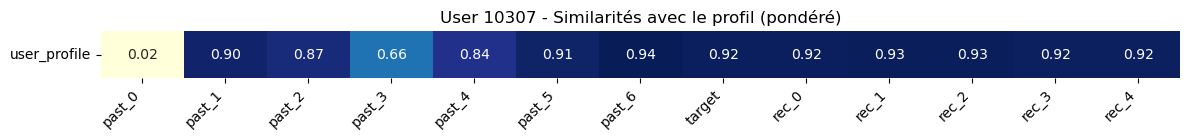


📉 Histogramme des scores :


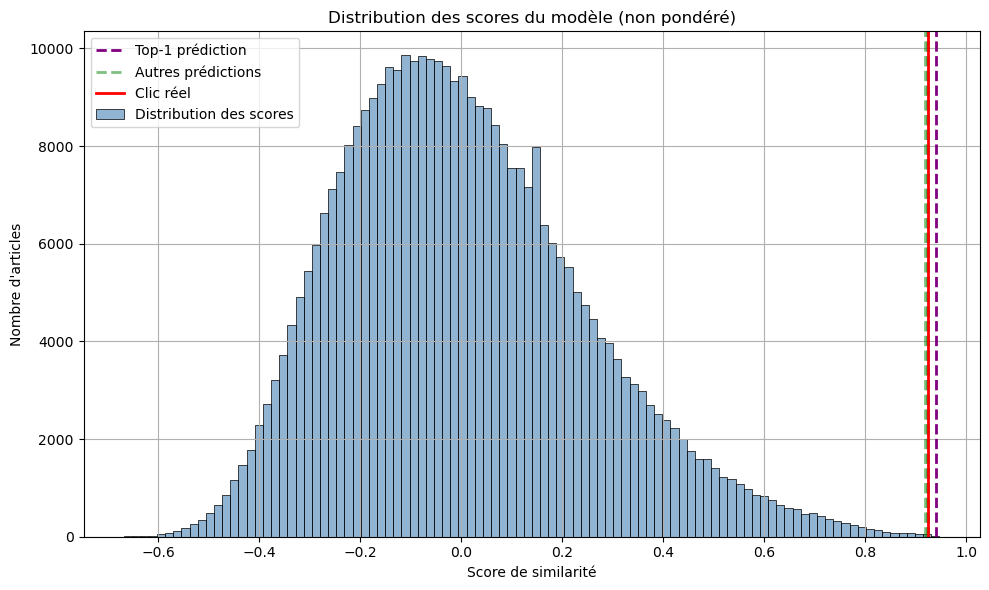

Score de l’article cliqué : 0.9244
Rang du clic réel : 23 / 364047
Score médian global : -0.0228
Score moyen top-5 : 0.9259

🧭 Projection t-SNE :


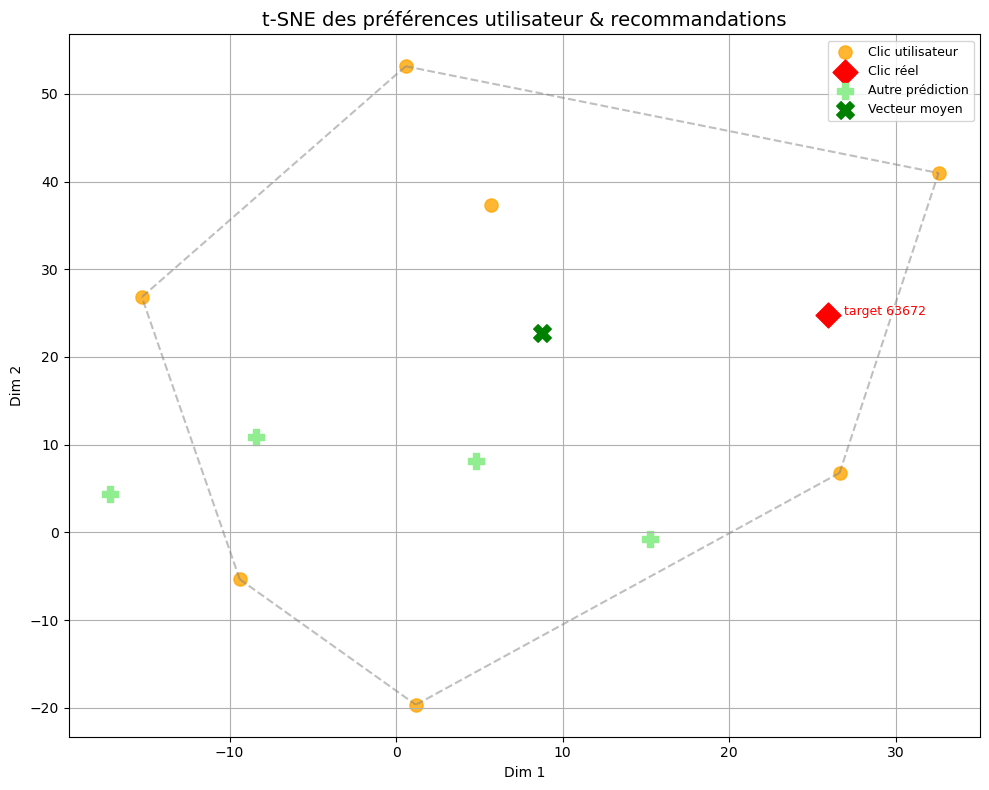

In [54]:
analyze_user_recommendation_recency(
    user_clicks_df=user_clicks_df,
    df=df,
    embeddings_df=embeddings_df,
    embedding_dict=embedding_dict,
    article_ids=article_ids,
    article_embeddings=article_embeddings,
    user_id=10307,   # article avec hit !
    top_n=5,
    alpha=0.85,
    beta=1.2
)


# Métriques pour un échantillon d'utilisateurs

In [36]:
def evaluate_prediction_functions(
    user_clicks_df,
    df,
    embedding_dict,
    article_ids,
    article_embeddings,
    predict_functions,
    k=5,
    n_users=100,
    seed=42
):
    """
    Évalue des fonctions de prédiction qui retournent :
    - top_k_preds : liste d’IDs recommandés
    - target_article_id : article réellement cliqué à prédire

    Si n_users=None, évalue tous les utilisateurs valides.

    Mesures : Hit@k, MAP@k, NDCG@k
    Retourne :
    - DataFrame récapitulatif des scores
    - Dictionnaire {modèle: liste des user_ids avec hit}
    """
    import numpy as np
    import pandas as pd
    from sklearn.metrics import ndcg_score
    from tqdm import tqdm

    np.random.seed(seed)
    all_users = user_clicks_df[user_clicks_df['clicked_article_ids'].apply(len) > 1]['user_id'].tolist()
    if n_users is None:
        sampled_users = all_users
    else:
        sampled_users = np.random.choice(all_users, size=min(n_users, len(all_users)), replace=False)

    results = {name: {"hit@k": [], "map@k": [], "ndcg@k": []} for name in predict_functions.keys()}
    hit_users = {name: [] for name in predict_functions.keys()}

    for user_id in tqdm(sampled_users, desc="Évaluation des modèles"):
        for name, predict_func in predict_functions.items():
            try:
                top_preds, target = predict_func(
                    user_id, df, embedding_dict, article_ids, article_embeddings)
                if top_preds is None or target is None:
                    continue

                top_ids = [aid for aid, _ in top_preds[:k]]

                # Hit@k
                hit = int(target in top_ids)
                if hit:
                    print(f"✅ HIT trouvé pour user {user_id} avec le modèle '{name}' (target: {target})")
                    hit_users[name].append(user_id)

                # MAP@k
                map_k = 0.0
                for i, aid in enumerate(top_ids):
                    if aid == target:
                        map_k = 1.0 / (i + 1)
                        break

                # NDCG@k
                relevance = [1 if aid == target else 0 for aid in top_ids]
                ndcg = ndcg_score([relevance], [list(reversed(range(len(relevance))))])

                results[name]["hit@k"].append(hit)
                results[name]["map@k"].append(map_k)
                results[name]["ndcg@k"].append(ndcg)

            except Exception as e:
                print(f"Erreur dans {name} pour user {user_id} : {e}")

    # Résumé
    summary = []
    for name, scores in results.items():
        summary.append({
            "modèle": name,
            f"Hit@{k}": np.mean(scores["hit@k"]),
            f"MAP@{k}": np.mean(scores["map@k"]),
            f"NDCG@{k}": np.mean(scores["ndcg@k"])
        })

    return pd.DataFrame(summary).sort_values(f"Hit@{k}", ascending=False), hit_users


## Embeddings de tous les articles

In [36]:
# nombre de prédictions
k = 5
predict_functions = {
    "Non pondéré": lambda uid, df, emb_dict, ids, embs: predict_topN_articles(
        uid, df, emb_dict, ids, embs, top_n=k),
    "Pondéré récence": lambda uid, df, emb_dict, ids, embs: predict_topN_weighted_by_recency(
        uid, df, emb_dict, ids, embs, alpha=0.9, beta=1.0, top_n=k),
    "Clic aléatoire": lambda uid, df, emb_dict, ids, embs: predict_random_target(
        uid, df, emb_dict, ids, embs, top_n=k, seed=42),
    "Clic aléatoire pondéré": lambda uid, df, emb_dict, ids, embs: predict_random_target_weighted(
        uid, df, emb_dict, ids, embs, top_n=k, alpha=0.9, beta=1.0, seed=42)
}

results_df, hit_users = evaluate_prediction_functions(
    user_clicks_df=user_clicks_df,
    df=df,
    embedding_dict=embedding_dict,
    article_ids=article_ids,
    article_embeddings=article_embeddings,
    predict_functions=predict_functions,
    k=k,
    n_users=1000
)

Évaluation des modèles:   5%|▌         | 53/1000 [00:55<16:40,  1.06s/it]

✅ HIT trouvé pour user 26590 avec le modèle 'Clic aléatoire pondéré' (target: 72334)


Évaluation des modèles:  10%|█         | 105/1000 [01:50<15:30,  1.04s/it]

✅ HIT trouvé pour user 87373 avec le modèle 'Pondéré récence' (target: 160974)


Évaluation des modèles:  14%|█▎        | 137/1000 [02:23<15:00,  1.04s/it]

✅ HIT trouvé pour user 149520 avec le modèle 'Clic aléatoire pondéré' (target: 161602)


Évaluation des modèles:  15%|█▌        | 154/1000 [02:41<14:37,  1.04s/it]

✅ HIT trouvé pour user 227294 avec le modèle 'Pondéré récence' (target: 128551)


Évaluation des modèles:  16%|█▌        | 157/1000 [02:44<14:37,  1.04s/it]

✅ HIT trouvé pour user 46708 avec le modèle 'Clic aléatoire pondéré' (target: 50715)


Évaluation des modèles:  16%|█▌        | 161/1000 [02:48<14:38,  1.05s/it]

✅ HIT trouvé pour user 283101 avec le modèle 'Pondéré récence' (target: 353673)


Évaluation des modèles:  20%|██        | 203/1000 [03:32<13:58,  1.05s/it]

✅ HIT trouvé pour user 119442 avec le modèle 'Clic aléatoire pondéré' (target: 160132)


Évaluation des modèles:  25%|██▍       | 248/1000 [04:20<13:26,  1.07s/it]

✅ HIT trouvé pour user 322362 avec le modèle 'Clic aléatoire pondéré' (target: 111738)


Évaluation des modèles:  25%|██▌       | 252/1000 [04:25<13:32,  1.09s/it]

✅ HIT trouvé pour user 290575 avec le modèle 'Pondéré récence' (target: 333150)


Évaluation des modèles:  25%|██▌       | 253/1000 [04:26<13:29,  1.08s/it]

✅ HIT trouvé pour user 290575 avec le modèle 'Clic aléatoire pondéré' (target: 336245)


Évaluation des modèles:  39%|███▉      | 389/1000 [06:51<10:36,  1.04s/it]

✅ HIT trouvé pour user 150176 avec le modèle 'Clic aléatoire pondéré' (target: 207994)


Évaluation des modèles:  43%|████▎     | 432/1000 [07:36<09:52,  1.04s/it]

✅ HIT trouvé pour user 92446 avec le modèle 'Non pondéré' (target: 160974)
✅ HIT trouvé pour user 92446 avec le modèle 'Pondéré récence' (target: 160974)
✅ HIT trouvé pour user 92446 avec le modèle 'Clic aléatoire' (target: 160974)


Évaluation des modèles:  43%|████▎     | 433/1000 [07:37<09:56,  1.05s/it]

✅ HIT trouvé pour user 92446 avec le modèle 'Clic aléatoire pondéré' (target: 160974)


Évaluation des modèles:  72%|███████▏  | 721/1000 [12:46<05:10,  1.11s/it]

✅ HIT trouvé pour user 243097 avec le modèle 'Non pondéré' (target: 123290)
✅ HIT trouvé pour user 243097 avec le modèle 'Pondéré récence' (target: 123290)
✅ HIT trouvé pour user 243097 avec le modèle 'Clic aléatoire' (target: 124350)


Évaluation des modèles:  72%|███████▏  | 722/1000 [12:47<05:09,  1.11s/it]

✅ HIT trouvé pour user 243097 avec le modèle 'Clic aléatoire pondéré' (target: 124350)


Évaluation des modèles:  74%|███████▍  | 738/1000 [13:05<04:37,  1.06s/it]

✅ HIT trouvé pour user 27505 avec le modèle 'Clic aléatoire' (target: 124352)


Évaluation des modèles:  74%|███████▍  | 739/1000 [13:06<04:37,  1.06s/it]

✅ HIT trouvé pour user 27505 avec le modèle 'Clic aléatoire pondéré' (target: 124352)


Évaluation des modèles:  75%|███████▍  | 749/1000 [13:16<04:26,  1.06s/it]

✅ HIT trouvé pour user 301618 avec le modèle 'Clic aléatoire pondéré' (target: 60009)


Évaluation des modèles:  77%|███████▋  | 768/1000 [13:37<04:06,  1.06s/it]

✅ HIT trouvé pour user 69606 avec le modèle 'Pondéré récence' (target: 50917)


Évaluation des modèles:  77%|███████▋  | 769/1000 [13:38<04:05,  1.06s/it]

✅ HIT trouvé pour user 69606 avec le modèle 'Clic aléatoire pondéré' (target: 50918)


Évaluation des modèles:  78%|███████▊  | 778/1000 [13:47<04:00,  1.08s/it]

✅ HIT trouvé pour user 65344 avec le modèle 'Clic aléatoire pondéré' (target: 32467)


Évaluation des modèles:  85%|████████▌ | 850/1000 [15:06<02:43,  1.09s/it]

✅ HIT trouvé pour user 172616 avec le modèle 'Clic aléatoire pondéré' (target: 160974)


Évaluation des modèles:  86%|████████▋ | 864/1000 [15:21<02:24,  1.06s/it]

✅ HIT trouvé pour user 24155 avec le modèle 'Clic aléatoire pondéré' (target: 123757)


Évaluation des modèles:  88%|████████▊ | 879/1000 [15:37<02:08,  1.06s/it]

✅ HIT trouvé pour user 85152 avec le modèle 'Pondéré récence' (target: 160974)


Évaluation des modèles:  88%|████████▊ | 882/1000 [15:40<02:05,  1.06s/it]

✅ HIT trouvé pour user 292624 avec le modèle 'Clic aléatoire pondéré' (target: 208150)


Évaluation des modèles:  91%|█████████ | 911/1000 [16:11<01:35,  1.08s/it]

✅ HIT trouvé pour user 47702 avec le modèle 'Pondéré récence' (target: 57616)


Évaluation des modèles:  94%|█████████▍| 943/1000 [16:44<00:59,  1.04s/it]

✅ HIT trouvé pour user 98990 avec le modèle 'Clic aléatoire pondéré' (target: 160974)


Évaluation des modèles:  98%|█████████▊| 977/1000 [17:20<00:24,  1.06s/it]

✅ HIT trouvé pour user 87221 avec le modèle 'Clic aléatoire pondéré' (target: 160974)


Évaluation des modèles:  99%|█████████▉| 992/1000 [17:36<00:08,  1.05s/it]

✅ HIT trouvé pour user 29425 avec le modèle 'Pondéré récence' (target: 160974)


Évaluation des modèles: 100%|█████████▉| 999/1000 [17:43<00:01,  1.05s/it]

✅ HIT trouvé pour user 278204 avec le modèle 'Clic aléatoire pondéré' (target: 50289)


Évaluation des modèles: 100%|██████████| 1000/1000 [17:45<00:00,  1.07s/it]


In [37]:
print(results_df)
print("Hits détectés pour modèle pondéré aléatoire :", hit_users["Clic aléatoire pondéré"])

                   modèle  Hit@5     MAP@5    NDCG@5
3  Clic aléatoire pondéré  0.019  0.007717  0.010470
1         Pondéré récence  0.010  0.006417  0.007323
2          Clic aléatoire  0.003  0.001833  0.002131
0             Non pondéré  0.002  0.002000  0.002000
Hits détectés pour modèle pondéré aléatoire : [26590, 149520, 46708, 119442, 322362, 290575, 150176, 92446, 243097, 27505, 301618, 69606, 65344, 172616, 24155, 292624, 98990, 87221, 278204]


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_recommendation_results(results_df):
    """
    Affiche un graphique comparatif clair des résultats de recommandation pour chaque modèle.
    """
    melted_df = results_df.melt(id_vars="modèle", var_name="Métrique", value_name="Score")

    plt.figure(figsize=(10, 6))
    sns.barplot(data=melted_df, x="modèle", y="Score", hue="Métrique")
    plt.title("Comparaison des performances des modèles de recommandation")
    plt.ylabel("Score moyen")
    plt.xlabel("Modèle")
    plt.xticks(rotation=15)
    plt.legend(title="Métrique")
    plt.tight_layout()
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.show()


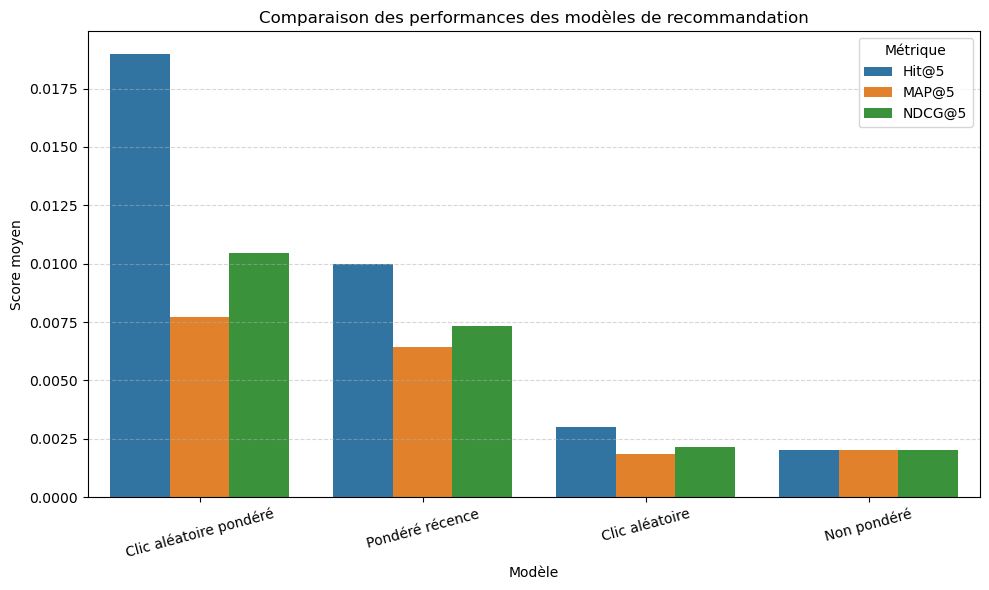

In [39]:
plot_recommendation_results(results_df)


## Embeddings restreint aux articles disponibles pendant la période d'observation

✅ Changement de contexte <br>

On conserve dans embeddings_df tous les articles publiés avant la fin de la période d’observation

Peu importe qu’ils aient été cliqués ou non,

Il faut simplement que leur created_at_ts ≤ max(session_start) <b>+ 86400 (un jour)</b>

In [40]:
# 1. Définir la limite temporelle : 1 jour après la dernière session observée
one_day_seconds = 86400
limite_ts = df["session_start"].max() + one_day_seconds

# 2. Sélectionner les article_id dont la date de publication est antérieure à cette limite
articles_disponibles = df_articles[df_articles["created_at_ts"] <= limite_ts]["article_id"].values

# 3. Filtrer embeddings_df sur ces articles
embeddings_df_restreint = embeddings_df.loc[embeddings_df.index.intersection(articles_disponibles)]

# 4. Mettre à jour les objets associés
article_ids = embeddings_df_restreint.index.to_numpy()
article_embeddings = embeddings_df_restreint.to_numpy()
embedding_dict = dict(zip(article_ids, article_embeddings))

# 5. (optionnel) Afficher le nombre d’articles conservés
print(f"{len(article_ids)} articles conservés sur {len(embeddings_df)} après filtrage temporel.")


257217 articles conservés sur 364047 après filtrage temporel.


In [41]:
results_df_time_limited, hit_userstime_limited = evaluate_prediction_functions(
    user_clicks_df=user_clicks_df,
    df=df,
    embedding_dict=embedding_dict,             # <-- mis à jour
    article_ids=article_ids,                   # <-- mis à jour
    article_embeddings=article_embeddings,     # <-- mis à jour
    predict_functions=predict_functions,
    k=5,
    n_users=1000  # ou un nombre pour échantillonner
)

Évaluation des modèles:   5%|▌         | 53/1000 [00:42<13:15,  1.19it/s]

✅ HIT trouvé pour user 26590 avec le modèle 'Clic aléatoire pondéré' (target: 72334)


Évaluation des modèles:  10%|█         | 105/1000 [01:25<12:01,  1.24it/s]

✅ HIT trouvé pour user 87373 avec le modèle 'Non pondéré' (target: 160974)
✅ HIT trouvé pour user 87373 avec le modèle 'Pondéré récence' (target: 160974)


Évaluation des modèles:  14%|█▎        | 137/1000 [01:50<11:23,  1.26it/s]

✅ HIT trouvé pour user 149520 avec le modèle 'Clic aléatoire pondéré' (target: 161602)


Évaluation des modèles:  15%|█▌        | 154/1000 [02:04<11:12,  1.26it/s]

✅ HIT trouvé pour user 227294 avec le modèle 'Pondéré récence' (target: 128551)


Évaluation des modèles:  16%|█▌        | 157/1000 [02:06<11:14,  1.25it/s]

✅ HIT trouvé pour user 46708 avec le modèle 'Clic aléatoire pondéré' (target: 50715)


Évaluation des modèles:  16%|█▌        | 161/1000 [02:10<11:12,  1.25it/s]

✅ HIT trouvé pour user 283101 avec le modèle 'Pondéré récence' (target: 353673)


Évaluation des modèles:  20%|██        | 202/1000 [02:42<10:31,  1.26it/s]

✅ HIT trouvé pour user 119442 avec le modèle 'Clic aléatoire' (target: 160132)


Évaluation des modèles:  20%|██        | 203/1000 [02:43<10:30,  1.26it/s]

✅ HIT trouvé pour user 119442 avec le modèle 'Clic aléatoire pondéré' (target: 160132)


Évaluation des modèles:  25%|██▍       | 247/1000 [03:18<09:58,  1.26it/s]

✅ HIT trouvé pour user 322362 avec le modèle 'Pondéré récence' (target: 111663)


Évaluation des modèles:  25%|██▍       | 248/1000 [03:19<09:57,  1.26it/s]

✅ HIT trouvé pour user 322362 avec le modèle 'Clic aléatoire pondéré' (target: 111738)


Évaluation des modèles:  25%|██▌       | 252/1000 [03:22<09:57,  1.25it/s]

✅ HIT trouvé pour user 290575 avec le modèle 'Pondéré récence' (target: 333150)


Évaluation des modèles:  25%|██▌       | 253/1000 [03:23<10:02,  1.24it/s]

✅ HIT trouvé pour user 290575 avec le modèle 'Clic aléatoire pondéré' (target: 336245)


Évaluation des modèles:  39%|███▉      | 389/1000 [05:14<08:36,  1.18it/s]

✅ HIT trouvé pour user 150176 avec le modèle 'Clic aléatoire pondéré' (target: 207994)


Évaluation des modèles:  43%|████▎     | 432/1000 [05:50<07:37,  1.24it/s]

✅ HIT trouvé pour user 92446 avec le modèle 'Non pondéré' (target: 160974)
✅ HIT trouvé pour user 92446 avec le modèle 'Pondéré récence' (target: 160974)
✅ HIT trouvé pour user 92446 avec le modèle 'Clic aléatoire' (target: 160974)


Évaluation des modèles:  43%|████▎     | 433/1000 [05:51<07:37,  1.24it/s]

✅ HIT trouvé pour user 92446 avec le modèle 'Clic aléatoire pondéré' (target: 160974)


Évaluation des modèles:  72%|███████▏  | 721/1000 [09:52<03:43,  1.25it/s]

✅ HIT trouvé pour user 243097 avec le modèle 'Non pondéré' (target: 123290)
✅ HIT trouvé pour user 243097 avec le modèle 'Pondéré récence' (target: 123290)
✅ HIT trouvé pour user 243097 avec le modèle 'Clic aléatoire' (target: 124350)


Évaluation des modèles:  72%|███████▏  | 722/1000 [09:52<03:43,  1.24it/s]

✅ HIT trouvé pour user 243097 avec le modèle 'Clic aléatoire pondéré' (target: 124350)


Évaluation des modèles:  74%|███████▍  | 738/1000 [10:05<03:32,  1.23it/s]

✅ HIT trouvé pour user 27505 avec le modèle 'Clic aléatoire' (target: 124352)


Évaluation des modèles:  74%|███████▍  | 739/1000 [10:06<03:31,  1.24it/s]

✅ HIT trouvé pour user 27505 avec le modèle 'Clic aléatoire pondéré' (target: 124352)


Évaluation des modèles:  75%|███████▍  | 749/1000 [10:15<03:30,  1.19it/s]

✅ HIT trouvé pour user 301618 avec le modèle 'Clic aléatoire pondéré' (target: 60009)


Évaluation des modèles:  77%|███████▋  | 768/1000 [10:30<03:07,  1.24it/s]

✅ HIT trouvé pour user 69606 avec le modèle 'Pondéré récence' (target: 50917)


Évaluation des modèles:  77%|███████▋  | 769/1000 [10:31<03:07,  1.23it/s]

✅ HIT trouvé pour user 69606 avec le modèle 'Clic aléatoire pondéré' (target: 50918)


Évaluation des modèles:  78%|███████▊  | 778/1000 [10:38<03:00,  1.23it/s]

✅ HIT trouvé pour user 65344 avec le modèle 'Clic aléatoire pondéré' (target: 32467)


Évaluation des modèles:  85%|████████▍ | 849/1000 [11:36<02:02,  1.23it/s]

✅ HIT trouvé pour user 172616 avec le modèle 'Clic aléatoire' (target: 160974)


Évaluation des modèles:  85%|████████▌ | 850/1000 [11:37<02:02,  1.22it/s]

✅ HIT trouvé pour user 172616 avec le modèle 'Clic aléatoire pondéré' (target: 160974)


Évaluation des modèles:  86%|████████▋ | 864/1000 [11:48<01:50,  1.24it/s]

✅ HIT trouvé pour user 24155 avec le modèle 'Clic aléatoire pondéré' (target: 123757)


Évaluation des modèles:  88%|████████▊ | 879/1000 [12:00<01:36,  1.25it/s]

✅ HIT trouvé pour user 85152 avec le modèle 'Non pondéré' (target: 160974)
✅ HIT trouvé pour user 85152 avec le modèle 'Pondéré récence' (target: 160974)


Évaluation des modèles:  88%|████████▊ | 882/1000 [12:03<01:38,  1.20it/s]

✅ HIT trouvé pour user 292624 avec le modèle 'Clic aléatoire pondéré' (target: 208150)


Évaluation des modèles:  91%|█████████ | 911/1000 [12:27<01:12,  1.22it/s]

✅ HIT trouvé pour user 47702 avec le modèle 'Pondéré récence' (target: 57616)


Évaluation des modèles:  94%|█████████▍| 942/1000 [12:52<00:46,  1.24it/s]

✅ HIT trouvé pour user 98990 avec le modèle 'Clic aléatoire' (target: 160974)


Évaluation des modèles:  94%|█████████▍| 943/1000 [12:52<00:46,  1.24it/s]

✅ HIT trouvé pour user 98990 avec le modèle 'Clic aléatoire pondéré' (target: 160974)


Évaluation des modèles:  95%|█████████▍| 948/1000 [12:56<00:42,  1.23it/s]

✅ HIT trouvé pour user 226576 avec le modèle 'Pondéré récence' (target: 209348)


Évaluation des modèles:  98%|█████████▊| 976/1000 [13:19<00:19,  1.23it/s]

✅ HIT trouvé pour user 87221 avec le modèle 'Clic aléatoire' (target: 160974)


Évaluation des modèles:  98%|█████████▊| 977/1000 [13:20<00:18,  1.22it/s]

✅ HIT trouvé pour user 87221 avec le modèle 'Clic aléatoire pondéré' (target: 160974)


Évaluation des modèles:  99%|█████████▉| 992/1000 [13:32<00:06,  1.24it/s]

✅ HIT trouvé pour user 29425 avec le modèle 'Non pondéré' (target: 160974)
✅ HIT trouvé pour user 29425 avec le modèle 'Pondéré récence' (target: 160974)


Évaluation des modèles: 100%|█████████▉| 999/1000 [13:38<00:00,  1.22it/s]

✅ HIT trouvé pour user 278204 avec le modèle 'Clic aléatoire pondéré' (target: 50289)


Évaluation des modèles: 100%|██████████| 1000/1000 [13:39<00:00,  1.22it/s]


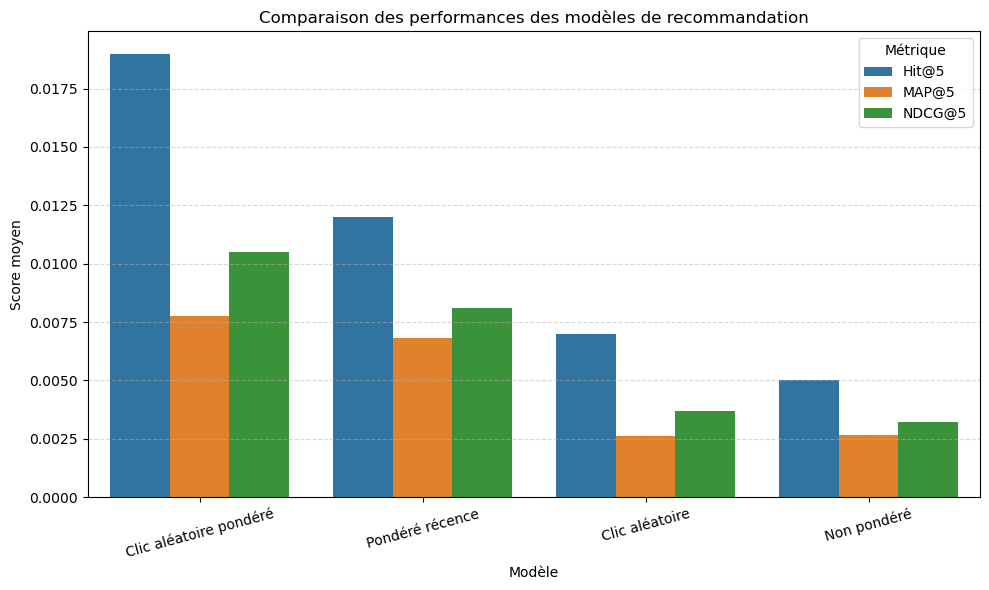

In [42]:
plot_recommendation_results(results_df_time_limited)


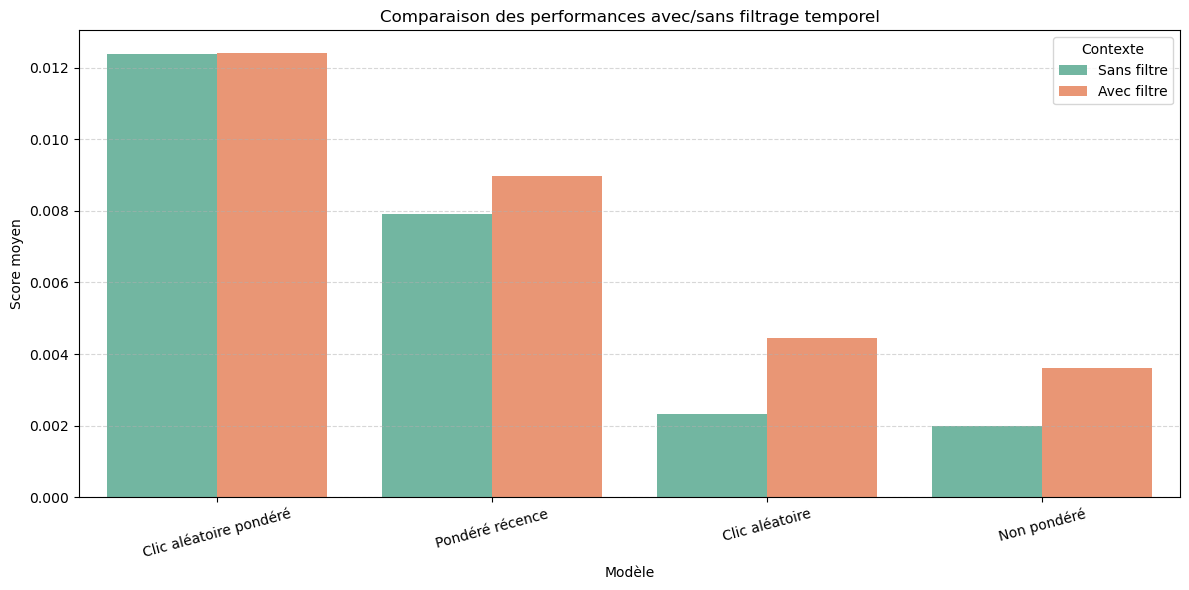

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_comparative_results(results_df_full, results_df_limited, suffixes=("Sans filtre", "Avec filtre")):
    """
    Affiche un graphique comparant les performances de chaque modèle avec ou sans filtrage temporel.
    """
    # Ajouter un identifiant de contexte
    df_full = results_df_full.copy()
    df_full["Contexte"] = suffixes[0]

    df_limited = results_df_limited.copy()
    df_limited["Contexte"] = suffixes[1]

    # Fusionner les deux DataFrames
    df_all = pd.concat([df_full, df_limited], axis=0)

    # Convertir au format long
    df_long = df_all.melt(id_vars=["modèle", "Contexte"], var_name="Métrique", value_name="Score")

    # Tracer
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_long, x="modèle", y="Score", hue="Contexte", palette="Set2", errorbar=None)
    plt.title("Comparaison des performances avec/sans filtrage temporel")
    plt.ylabel("Score moyen")
    plt.xlabel("Modèle")
    plt.xticks(rotation=15)
    plt.legend(title="Contexte")
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Appel
plot_comparative_results(results_df, results_df_time_limited)


## Influence de la popularité d'un article

In [66]:
def evaluate_prediction_functions_with_popularity(
    user_clicks_df,
    df,
    embedding_dict,
    article_ids,
    article_embeddings,
    df_articles,
    predict_functions,
    k=5,
    n_users=100,
    seed=42
):
    """
    Évalue des fonctions de prédiction qui utilisent la popularité intégrée.
    
    Chaque fonction doit retourner : (top_k_predictions, target_article_id)
    Les top_k_predictions sont des tuples : (article_id, score)

    Retourne :
    - DataFrame récapitulatif des scores (Hit@k, MAP@k, NDCG@k)
    - Dictionnaire {modèle: liste des user_ids avec hit}
    """
    import numpy as np
    import pandas as pd
    from sklearn.metrics import ndcg_score
    from tqdm import tqdm

    np.random.seed(seed)
    all_users = user_clicks_df[user_clicks_df['clicked_article_ids'].apply(len) > 1]['user_id'].tolist()
    sampled_users = np.random.choice(all_users, size=min(n_users, len(all_users)), replace=False)

    results = {name: {"hit@k": [], "map@k": [], "ndcg@k": []} for name in predict_functions.keys()}
    hit_users = {name: [] for name in predict_functions.keys()}

    for user_id in tqdm(sampled_users, desc="Évaluation des modèles (avec popularité)"):

        for name, predict_func in predict_functions.items():
            try:
                top_preds, target = predict_func(
                    user_id, df, embedding_dict, article_ids, article_embeddings, df_articles
                )
                if top_preds is None or target is None:
                    continue

                top_ids = [aid for aid, _ in top_preds[:k]]

                # Hit@k
                hit = int(target in top_ids)
                if hit:
                    hit_users[name].append(user_id)

                # MAP@k
                map_k = 0.0
                for i, aid in enumerate(top_ids):
                    if aid == target:
                        map_k = 1.0 / (i + 1)
                        break

                # NDCG@k
                relevance = [1 if aid == target else 0 for aid in top_ids]
                ndcg = ndcg_score([relevance], [list(reversed(range(len(relevance))))])

                results[name]["hit@k"].append(hit)
                results[name]["map@k"].append(map_k)
                results[name]["ndcg@k"].append(ndcg)

            except Exception as e:
                print(f"Erreur pour user {user_id} avec le modèle '{name}' : {e}")

    # Résumé
    summary = []
    for name, scores in results.items():
        summary.append({
            "modèle": name,
            f"Hit@{k}": np.mean(scores["hit@k"]),
            f"MAP@{k}": np.mean(scores["map@k"]),
            f"NDCG@{k}": np.mean(scores["ndcg@k"])
        })

    return pd.DataFrame(summary).sort_values(f"Hit@{k}", ascending=False), hit_users

On va faire un test paramétrique sur une option qui donnait de bons résultat la fonction qui tient compte de la récence/fraicheur des articles. C'est une dimension orhtogonale (à priori) à la popularité, donc complémentaire.

In [69]:
def predict_topN_recency_popularity(
    user_id,
    df,
    embedding_dict,
    article_ids,
    article_embeddings,
    df_articles,
    alpha=0.9,
    beta=1.0,
    pop_alpha=0.8,
    top_n=5
):
    """
    Recommande les top-N articles en combinant :
    - Similarité de contenu pondérée par récence utilisateur (alpha)
    - Fraîcheur des articles (beta)
    - Popularité normalisée (pop_alpha)

    Retour :
    - Liste top-N : (article_id, score_final)
    - article_id du dernier clic
    """
    user_clicks = df[df["user_id"] == user_id].sort_values("click_timestamp")
    clicked_article_ids = user_clicks["click_article_id"].tolist()

    if len(clicked_article_ids) < 2:
        return None, None

    target_article_id = clicked_article_ids[-1]
    past_ids = clicked_article_ids[:-1]

    past_vectors = [embedding_dict[aid] for aid in past_ids if aid in embedding_dict]
    if not past_vectors:
        return None, target_article_id

    embeddings = np.stack(past_vectors)

    # Poids décroissants selon la récence des clics
    weights = np.array([alpha ** i for i in reversed(range(len(embeddings)))])
    weights = weights / weights.sum()

    user_profile = np.average(embeddings, axis=0, weights=weights).reshape(1, -1)

    # Similarités cosinus
    similarities = cosine_similarity(user_profile, article_embeddings)[0]

    # Exclure les clics passés (pas le target)
    clicked_set = set(past_ids)
    candidate_indices = [i for i, aid in enumerate(article_ids) if aid not in clicked_set]

    if not candidate_indices:
        return None, target_article_id

    # Récupération des infos candidates
    candidate_ids = [article_ids[i] for i in candidate_indices]

    # ⏳ Fraîcheur (récence de publication)
    article_to_timestamp = df.drop_duplicates("article_id").set_index("article_id")["created_at_ts"].to_dict()
    candidate_timestamps = np.array([article_to_timestamp.get(aid, 0) for aid in candidate_ids])
    if len(candidate_timestamps) > 1:
        min_ts = candidate_timestamps.min()
        max_ts = candidate_timestamps.max()
        recency_scores = (candidate_timestamps - min_ts) / (max_ts - min_ts + 1e-8)
    else:
        recency_scores = np.ones(len(candidate_timestamps))

    # ⭐ Popularité normalisée
    popularity_map = df_articles.set_index("article_id")["popularity_norm"].to_dict()
    popularity_scores = np.array([popularity_map.get(aid, 0) for aid in candidate_ids])

    # 📈 Calcul final
    sim_scores = similarities[candidate_indices]
    combined_scores = pop_alpha * sim_scores + (1 - pop_alpha) * popularity_scores
    final_scores = combined_scores * (recency_scores ** beta)

    # Top-N
    top_idx = np.argsort(final_scores)[::-1][:top_n]
    top_articles = [(candidate_ids[i], final_scores[i]) for i in top_idx]

    return top_articles, target_article_id


Évaluation des modèles (avec popularité): 100%|██████████| 100/100 [01:24<00:00,  1.18it/s]


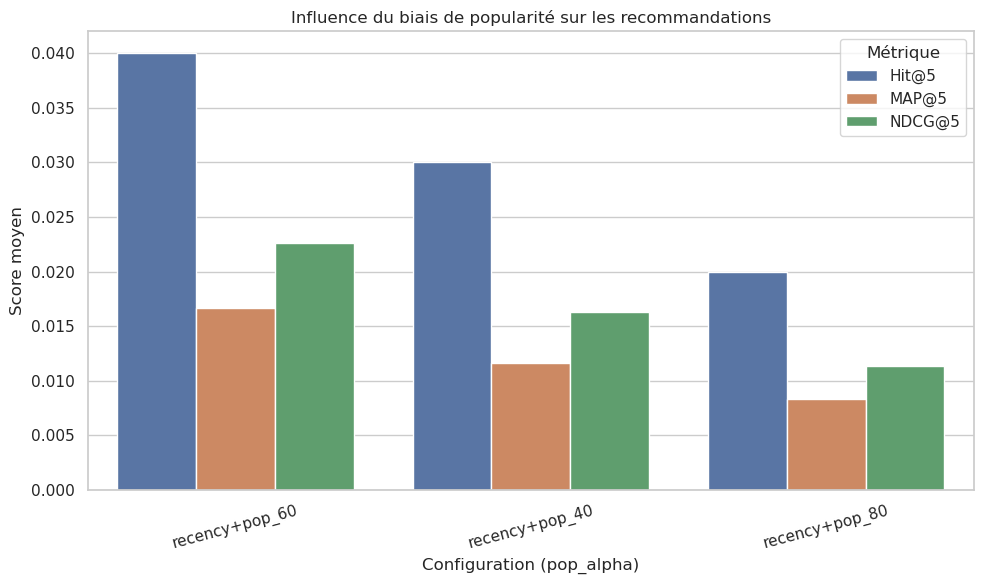

,modèle,Hit@5,MAP@5,NDCG@5
1,recency+pop_60,0.04,0.016667,0.022619
2,recency+pop_40,0.03,0.011667,0.016309
0,recency+pop_80,0.02,0.008333,0.011309


In [70]:
# Définir les valeurs de pop_alpha à tester
pop_alphas = [0.8, 0.6, 0.4]

# Dictionnaire des fonctions à tester
predict_functions = {
    f"recency+pop_{int(p * 100)}": (
        lambda p=p: (  # utiliser lambda p=p pour capturer la valeur de boucle
            lambda user_id, df, embedding_dict, article_ids, article_embeddings, df_articles:
                predict_topN_recency_popularity(
                    user_id,
                    df,
                    embedding_dict,
                    article_ids,
                    article_embeddings,
                    df_articles,
                    alpha=0.9,
                    beta=1.0,
                    pop_alpha=p,
                    top_n=5
                )
        )
    )()
    for p in pop_alphas
}

# Lancer l'évaluation
results_df, hit_users = evaluate_prediction_functions_with_popularity(
    user_clicks_df=user_clicks_df,
    df=df,
    embedding_dict=embedding_dict,
    article_ids=article_ids,
    article_embeddings=article_embeddings,
    df_articles=df_articles,
    predict_functions=predict_functions,
    k=5,
    n_users=100,
    seed=42
)

# Affichage des résultats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
results_df_melted = results_df.melt(id_vars="modèle", var_name="Métrique", value_name="Score")

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df_melted, x="modèle", y="Score", hue="Métrique")
plt.title("Influence du biais de popularité sur les recommandations")
plt.ylabel("Score moyen")
plt.xlabel("Configuration (pop_alpha)")
plt.xticks(rotation=15)
plt.legend(title="Métrique")
plt.tight_layout()
plt.show()

# Affichage brut en DataFrame
results_df


In [71]:
import itertools
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import ndcg_score

# Grilles à tester
alpha_vals = [0.9, 0.8]
beta_vals = [1.0, 0.5]
pop_alpha_vals = [0.8, 0.6, 0.4]

grid_results = []

# Boucle sur les combinaisons de paramètres
for alpha, beta, pop_alpha in tqdm(list(itertools.product(alpha_vals, beta_vals, pop_alpha_vals)),
                                    desc="Grid Search 3D"):

    def custom_predict_func(user_id, df, embedding_dict, article_ids, article_embeddings, df_articles):
        return predict_topN_recency_popularity(
            user_id,
            df,
            embedding_dict,
            article_ids,
            article_embeddings,
            df_articles,
            alpha=alpha,
            beta=beta,
            pop_alpha=pop_alpha,
            top_n=5
        )

    predict_functions = {
        f"α={alpha}_β={beta}_pop={pop_alpha}": custom_predict_func
    }

    results_df, _ = evaluate_prediction_functions_with_popularity(
        user_clicks_df=user_clicks_df,
        df=df,
        embedding_dict=embedding_dict,
        article_ids=article_ids,
        article_embeddings=article_embeddings,
        df_articles=df_articles,
        predict_functions=predict_functions,
        k=5,
        n_users=100,
        seed=42
    )

    for _, row in results_df.iterrows():
        grid_results.append({
            "alpha": alpha,
            "beta": beta,
            "pop_alpha": pop_alpha,
            "Hit@5": row["Hit@5"],
            "MAP@5": row["MAP@5"],
            "NDCG@5": row["NDCG@5"]
        })

# Résultat final
grid_results_df = pd.DataFrame(grid_results)
grid_results_df.sort_values("Hit@5", ascending=False)


Grid Search 3D: 100%|██████████| 12/12 [05:46<00:00, 28.86s/it]


,alpha,beta,pop_alpha,Hit@5,MAP@5,NDCG@5
1,0.9,1.0,0.6,0.04,0.016667,0.022619
4,0.9,0.5,0.6,0.04,0.016667,0.022619
7,0.8,1.0,0.6,0.04,0.014000,0.020356
2,0.9,1.0,0.4,0.03,0.011667,0.016309
5,0.9,0.5,0.4,0.03,0.011667,0.016309
10,0.8,0.5,0.6,0.03,0.012000,0.016487
0,0.9,1.0,0.8,0.02,0.008333,0.011309
3,0.9,0.5,0.8,0.02,0.008333,0.011309
8,0.8,1.0,0.4,0.02,0.008333,0.011309
11,0.8,0.5,0.4,0.02,0.008333,0.011309


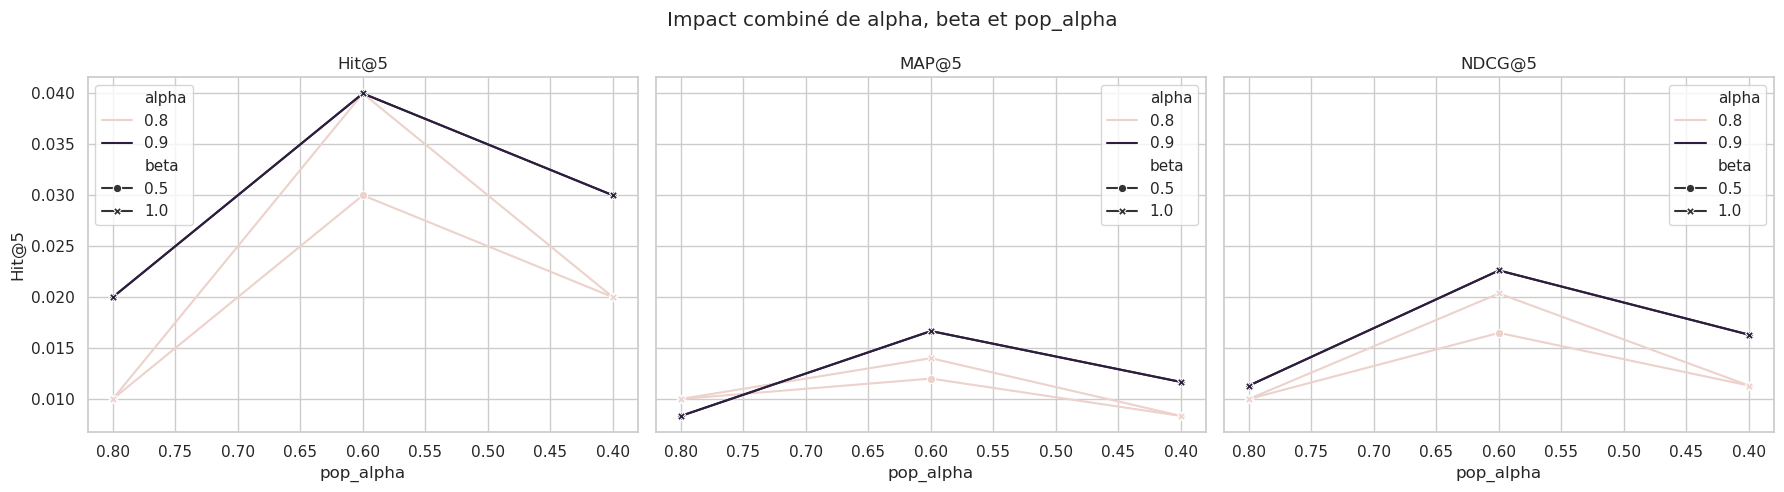

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, metric in enumerate(["Hit@5", "MAP@5", "NDCG@5"]):
    sns.lineplot(
        data=grid_results_df,
        x="pop_alpha",
        y=metric,
        hue="alpha",
        style="beta",
        markers=True,
        dashes=False,
        ax=axs[i]
    )
    axs[i].invert_xaxis()
    axs[i].set_title(metric)
    axs[i].grid(True)

plt.suptitle("Impact combiné de alpha, beta et pop_alpha")
plt.tight_layout()
plt.show()


🔍 Observations 

✅ pop_alpha = 0.6 est le sweet spot ➜ bonne balance entre contenu et popularité.

✅ alpha = 0.9 donne de meilleurs résultats que 0.8 ➜ les clics plus anciens gardent une certaine valeur.

✅ beta (fraîcheur des articles) n’a pas d’impact décisif entre 1.0 et 0.5 dans ce test — à creuser plus finement peut-être.

❗ pop_alpha = 0.8 ou 0.4 dégradent les performances ➜ trop ou pas assez de biais vers la popularité n'aide pas.

choix: pop_alpha=0.6 beta=1, alpha=0.9

## Filtrage des power-users